<a href="https://colab.research.google.com/github/Riadhchibani/Multi-Modal_AI/blob/main/mutli_modal_main_with_pca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning data

**Import libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier

import seaborn as sns

# Ignore warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")

Data cleaning

In [2]:
dataF = pd.read_csv('/content/labels_brset.csv', sep = ',')
dataF.head()

,image_id,patient_id,camera,patient_age,comorbidities,diabetes_time_y,insuline,patient_sex,exam_eye,diabetes,...,amd,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc,other,quality
0,img00001,1,Canon CR,48.0,diabetes1,12,yes,1,1,yes,...,0,0,0,0,0,0,0,1,0,Adequate
1,img00002,1,Canon CR,48.0,diabetes1,12,yes,1,2,yes,...,0,0,0,0,0,0,0,1,0,Adequate
2,img00003,2,Canon CR,18.0,diabetes1,7,yes,2,1,yes,...,0,0,0,0,0,0,0,0,0,Adequate
3,img00004,2,Canon CR,18.0,diabetes1,7,yes,2,2,yes,...,0,0,0,0,0,0,0,0,0,Adequate
4,img00005,3,Canon CR,22.0,diabetes1,11,yes,1,1,yes,...,0,0,0,0,0,0,0,0,0,Adequate


In [3]:
print(dataF.columns)

Index(['image_id', 'patient_id', 'camera', 'patient_age', 'comorbidities',
       'diabetes_time_y', 'insuline', 'patient_sex', 'exam_eye', 'diabetes',
       'nationality', 'optic_disc', 'vessels', 'macula', 'DR_SDRG', 'DR_ICDR',
       'focus', 'Illuminaton', 'image_field', 'artifacts',
       'diabetic_retinopathy', 'macular_edema', 'scar', 'nevus', 'amd',
       'vascular_occlusion', 'hypertensive_retinopathy', 'drusens',
       'hemorrhage', 'retinal_detachment', 'myopic_fundus',
       'increased_cup_disc', 'other', 'quality'],
      dtype='object')


In [4]:
dataF.describe()

,patient_id,patient_age,patient_sex,exam_eye,vessels,macula,DR_SDRG,DR_ICDR,focus,Illuminaton,...,nevus,amd,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc,other
count,16266.000000,10820.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,...,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000
mean,4275.474302,57.655453,1.617976,1.498647,1.049613,1.287532,0.180930,0.176933,1.033137,1.005164,...,0.007992,0.018382,0.006209,0.017460,0.174167,0.005840,0.000430,0.016599,0.197037,0.050412
std,2463.584452,18.261783,0.485897,0.500014,0.217150,0.452626,0.747103,0.722515,0.179684,0.071678,...,0.089043,0.134332,0.078556,0.130981,0.379265,0.076201,0.020741,0.127767,0.397773,0.218800
min,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2158.250000,47.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4270.000000,61.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6420.750000,71.000000,2.000000,2.000000,1.000000,2.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8524.000000,97.000000,2.000000,2.000000,2.000000,2.000000,4.000000,4.000000,2.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16266 entries, 0 to 16265
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   image_id                  16266 non-null  object 
 1   patient_id                16266 non-null  int64  
 2   camera                    16266 non-null  object 
 3   patient_age               10820 non-null  float64
 4   comorbidities             8029 non-null   object 
 5   diabetes_time_y           1910 non-null   object 
 6   insuline                  1714 non-null   object 
 7   patient_sex               16266 non-null  int64  
 8   exam_eye                  16266 non-null  int64  
 9   diabetes                  16266 non-null  object 
 10  nationality               16266 non-null  object 
 11  optic_disc                16266 non-null  object 
 12  vessels                   16266 non-null  int64  
 13  macula                    16266 non-null  int64  
 14  DR_SDR

droping all features can not help us

1.   image_id
2.   patient_id
3.   camera
4.   nationality
5.   focus
5.   Illuminaton
5.   image_field
5.   artifacts
5.   quality
5.   other

In [6]:
dataF = dataF.drop(columns=['image_id', 'patient_id', 'camera', 'nationality', 'focus', 'Illuminaton', 'image_field', 'artifacts', 'quality', 'other'])
dataF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16266 entries, 0 to 16265
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_age               10820 non-null  float64
 1   comorbidities             8029 non-null   object 
 2   diabetes_time_y           1910 non-null   object 
 3   insuline                  1714 non-null   object 
 4   patient_sex               16266 non-null  int64  
 5   exam_eye                  16266 non-null  int64  
 6   diabetes                  16266 non-null  object 
 7   optic_disc                16266 non-null  object 
 8   vessels                   16266 non-null  int64  
 9   macula                    16266 non-null  int64  
 10  DR_SDRG                   16266 non-null  int64  
 11  DR_ICDR                   16266 non-null  int64  
 12  diabetic_retinopathy      16266 non-null  int64  
 13  macular_edema             16266 non-null  int64  
 14  scar  

the age : filling by the mean for each gender

In [7]:
dataF['patient_age'].unique()

array([48., 18., 22., 23., 14., 20., 28., 13., 37., 21., 16., 24., 26.,
       19., 42., 17., 27., 39., 25., 30., 29., 15., 32., 57., 44., 38.,
       47., 34., 10., 59., 66., 82., 77., 68., 72., 87., 80., 41., 76.,
       91., 71., 73., 83., 31., 45., 61., 55., 75., 81., 64., 63., 46.,
       74., 65., 33., 53., 50., 51., 69., 49., 62., 52., 70., 79., 84.,
       60., 78., 54., 56., 58., 85., 86., 11., 40., nan,  9., 36., 90.,
       67., 88.,  7., 35., 43., 89., 12.,  8., 95., 93., 97.,  6., 94.,
        5., 92.])

In [8]:
dataF['patient_age'] = dataF.groupby('patient_sex')['patient_age'].transform(lambda x: x.fillna(x.mean()))
dataF['patient_age'].describe()

,patient_age
count,16266.000000
mean,57.622969
std,14.914914
min,5.000000
25%,55.000000
50%,58.684427
75%,66.000000
max,97.000000


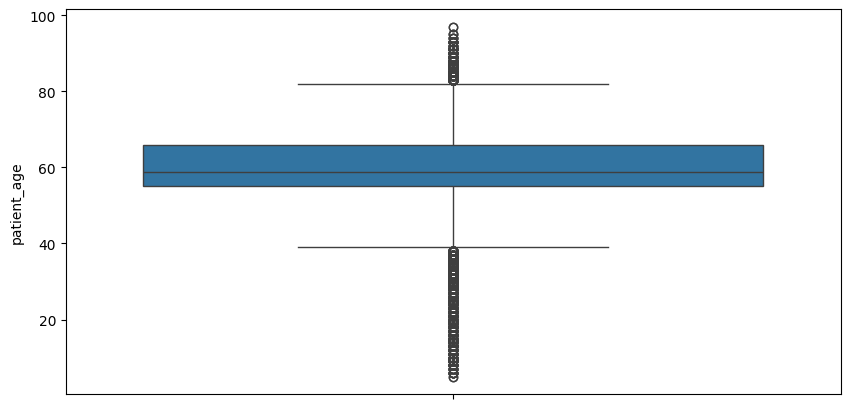

In [9]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataF['patient_age'])
plt.show()

In [10]:
print(dataF['patient_age'].describe())
print('null value count' , dataF['patient_age'].isna().sum())

count    16266.000000
mean        57.622969
std         14.914914
min          5.000000
25%         55.000000
50%         58.684427
75%         66.000000
max         97.000000
Name: patient_age, dtype: float64
null value count 0


In [11]:
# change the type patient_age from float to int
dataF['patient_age'] = dataF['patient_age'].astype(int)

replace and fill the missing value for the column **diabetes_time_y**

In [12]:
print(dataF['diabetes_time_y'].unique())

['12' '7' '11' '1' '20' '5' '9' '2' '3' '14' '4' '15' '23' '13' '10' '8'
 nan '16' '17' '6' '25' '18' '19' '22' '0,5' '37' '26' '40' '30' '0,20'
 '10,00' '38' '0,2' '21' '24' '35' '27' '32' '29' '45' '28' '43' '1,5'
 '50' '0,1' '49' '41' '0,3' '34' '60' '1O' '0,8' '51' 'Não' '39' '31']


In [13]:
dataF['diabetes_time_y'] = dataF['diabetes_time_y'].replace('Não', np.nan)
dataF['diabetes_time_y']

,diabetes_time_y
0,12
1,12
2,7
3,7
4,11
...,...
16261,14
16262,4
16263,4
16264,NaN


In [14]:
print(dataF['diabetes_time_y'].unique())

['12' '7' '11' '1' '20' '5' '9' '2' '3' '14' '4' '15' '23' '13' '10' '8'
 nan '16' '17' '6' '25' '18' '19' '22' '0,5' '37' '26' '40' '30' '0,20'
 '10,00' '38' '0,2' '21' '24' '35' '27' '32' '29' '45' '28' '43' '1,5'
 '50' '0,1' '49' '41' '0,3' '34' '60' '1O' '0,8' '51' '39' '31']


In [15]:
print(dataF['diabetes_time_y'].apply(type).value_counts())

diabetes_time_y
<class 'float'>    14357
<class 'str'>       1909
Name: count, dtype: int64


In [16]:
print(dataF['diabetes_time_y'].describe())
print("null value count " ,dataF['diabetes_time_y'].isna().sum())
dataF['diabetes_time_y'].unique()

count     1909
unique      54
top         10
freq       252
Name: diabetes_time_y, dtype: object
null value count  14357


array(['12', '7', '11', '1', '20', '5', '9', '2', '3', '14', '4', '15',
       '23', '13', '10', '8', nan, '16', '17', '6', '25', '18', '19',
       '22', '0,5', '37', '26', '40', '30', '0,20', '10,00', '38', '0,2',
       '21', '24', '35', '27', '32', '29', '45', '28', '43', '1,5', '50',
       '0,1', '49', '41', '0,3', '34', '60', '1O', '0,8', '51', '39',
       '31'], dtype=object)

In [17]:
# dataF['diabetes_time_y'] = (
#      pd.to_numeric(dataF['diabetes_time_y'], errors='coerce')  # Convert safely
#      .fillna(0)                                                # Replace NaNs
#      .astype(float)                                              # Final cast
#  )
# dataF['diabetes_time_y'] = pd.to_numeric(dataF['diabetes_time_y'], errors='coerce')
# dataF['diabetes_time_y'] = dataF['diabetes_time_y'].apply(lambda x: float(x) if pd.notna(x) and str(x).lower() != 'unknown' else np.nan)
dataF['diabetes_time_y'] = dataF['diabetes_time_y'].apply(lambda x: float(str(x).replace(',', '.')) if pd.notna(x) and str(x).replace(',', '.').replace('.', '', 1).isdigit() else np.nan)



In [18]:
dataF['diabetes_time_y'].unique()

array([12. ,  7. , 11. ,  1. , 20. ,  5. ,  9. ,  2. ,  3. , 14. ,  4. ,
       15. , 23. , 13. , 10. ,  8. ,  nan, 16. , 17. ,  6. , 25. , 18. ,
       19. , 22. ,  0.5, 37. , 26. , 40. , 30. ,  0.2, 38. , 21. , 24. ,
       35. , 27. , 32. , 29. , 45. , 28. , 43. ,  1.5, 50. ,  0.1, 49. ,
       41. ,  0.3, 34. , 60. ,  0.8, 51. , 39. , 31. ])

In [19]:
#fill the null value by the mean of 'diabetes_time_y' column and not above the age of patient
dataF['diabetes_time_y'] = dataF.groupby('patient_age')['diabetes_time_y'].transform(lambda x: x.fillna(x.mean()))


In [20]:
dataF['diabetes_time_y'] = dataF.groupby('patient_age')['diabetes_time_y'].transform(lambda x: x.fillna(x.mean()))

In [21]:
# print(dataF['diabetes_time_y'].describe())
# print("null value count " ,dataF['diabetes_time_y'].isna().sum())
dataF['diabetes_time_y'].unique()

array([12.        ,  7.        , 11.        ,  1.        , 20.        ,
        5.        ,  9.        ,  2.        ,  3.        , 14.        ,
        4.        , 15.        , 23.        , 13.        , 10.        ,
        8.        ,  3.16666667, 16.        , 17.        , 10.94117647,
        6.        , 25.        , 18.        , 19.        , 12.28571429,
       19.33333333, 22.        ,  0.5       , 37.        , 26.        ,
       17.83333333, 16.59649123, 17.10714286, 30.58823529,  9.9375    ,
        5.33333333, 12.69444444, 10.84615385, 11.2       , 16.125     ,
       18.228125  , 13.20454545, 11.37837838, 10.22142857, 12.7625    ,
       13.81818182, 11.93617021, 11.40930233, 12.92592593, 10.69387755,
       11.77647059, 11.36666667, 13.97777778, 13.92682927, 12.66666667,
       12.92307692, 14.8       , 25.66666667, 13.21428571, 16.4       ,
       10.15      , 13.31481481, 15.48571429, 19.05882353,  8.92352941,
       14.1875    , 13.13513514, 15.57142857, 13.55555556, 14.66

In [22]:
dataF['diabetes_time_y'] = dataF['diabetes_time_y'].fillna(0)

In [23]:
# Select rows where diabetes_time_y is NaN
nan_rows = dataF[dataF['diabetes_time_y'].isnull()]


nan_counts = dataF[dataF['diabetes_time_y'].isnull()].groupby('patient_age').size()
print(nan_counts)

Series([], dtype: int64)


In [24]:
dataF['diabetes_time_y'].unique()

array([12.        ,  7.        , 11.        ,  1.        , 20.        ,
        5.        ,  9.        ,  2.        ,  3.        , 14.        ,
        4.        , 15.        , 23.        , 13.        , 10.        ,
        8.        ,  3.16666667, 16.        , 17.        , 10.94117647,
        6.        , 25.        , 18.        , 19.        , 12.28571429,
       19.33333333, 22.        ,  0.5       , 37.        , 26.        ,
       17.83333333, 16.59649123, 17.10714286, 30.58823529,  9.9375    ,
        5.33333333, 12.69444444, 10.84615385, 11.2       , 16.125     ,
       18.228125  , 13.20454545, 11.37837838, 10.22142857, 12.7625    ,
       13.81818182, 11.93617021, 11.40930233, 12.92592593, 10.69387755,
       11.77647059, 11.36666667, 13.97777778, 13.92682927, 12.66666667,
       12.92307692, 14.8       , 25.66666667, 13.21428571, 16.4       ,
       10.15      , 13.31481481, 15.48571429, 19.05882353,  8.92352941,
       14.1875    , 13.13513514, 15.57142857, 13.55555556, 14.66

In [25]:
age_58_rows = dataF[dataF['patient_age'] == 55]
print(age_58_rows.count)


<bound method DataFrame.count of        patient_age           comorbidities  diabetes_time_y insuline  \
376             55            hypertension             12.0      NaN   
773             55                migraine             12.0      NaN   
774             55                migraine             12.0      NaN   
775             55  diabetes, hypertension             12.0      NaN   
776             55  diabetes, hypertension             12.0      NaN   
...            ...                     ...              ...      ...   
15877           55            hypertension             12.0      NaN   
16056           55                     NaN             12.0      NaN   
16057           55                     NaN             12.0      NaN   
16113           55                       0             12.0      NaN   
16114           55                       0             12.0      NaN   

       patient_sex  exam_eye diabetes optic_disc  vessels  macula  ...  scar  \
376              1    

In [26]:
print(dataF.isnull().sum())

patient_age                     0
comorbidities                8237
diabetes_time_y                 0
insuline                    14552
patient_sex                     0
exam_eye                        0
diabetes                        0
optic_disc                      0
vessels                         0
macula                          0
DR_SDRG                         0
DR_ICDR                         0
diabetic_retinopathy            0
macular_edema                   0
scar                            0
nevus                           0
amd                             0
vascular_occlusion              0
hypertensive_retinopathy        0
drusens                         0
hemorrhage                      0
retinal_detachment              0
myopic_fundus                   0
increased_cup_disc              0
dtype: int64


In [27]:
# check for invalid rows where diabetes_time_y > patient_age
invalid_rows = dataF[dataF['diabetes_time_y'] > dataF['patient_age']]
print(invalid_rows[['diabetes_time_y', 'patient_age']])
#print(dataF.loc[34])

     diabetes_time_y  patient_age
34              23.0           22
35              23.0           22
218             23.0           22
219             23.0           22


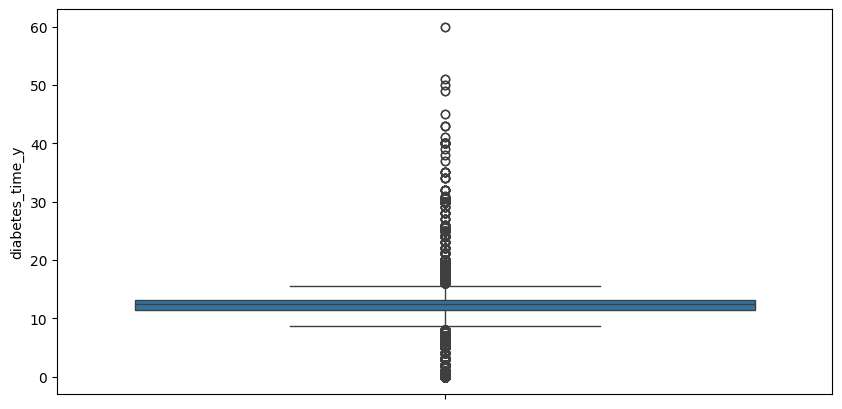

In [28]:
#boxplot for 'diabetes_time_y'
plt.figure(figsize=(10, 5))
sns.boxplot(data=dataF['diabetes_time_y'])
plt.show()

In [29]:
dataF['diabetes_time_y'].unique()

array([12.        ,  7.        , 11.        ,  1.        , 20.        ,
        5.        ,  9.        ,  2.        ,  3.        , 14.        ,
        4.        , 15.        , 23.        , 13.        , 10.        ,
        8.        ,  3.16666667, 16.        , 17.        , 10.94117647,
        6.        , 25.        , 18.        , 19.        , 12.28571429,
       19.33333333, 22.        ,  0.5       , 37.        , 26.        ,
       17.83333333, 16.59649123, 17.10714286, 30.58823529,  9.9375    ,
        5.33333333, 12.69444444, 10.84615385, 11.2       , 16.125     ,
       18.228125  , 13.20454545, 11.37837838, 10.22142857, 12.7625    ,
       13.81818182, 11.93617021, 11.40930233, 12.92592593, 10.69387755,
       11.77647059, 11.36666667, 13.97777778, 13.92682927, 12.66666667,
       12.92307692, 14.8       , 25.66666667, 13.21428571, 16.4       ,
       10.15      , 13.31481481, 15.48571429, 19.05882353,  8.92352941,
       14.1875    , 13.13513514, 15.57142857, 13.55555556, 14.66

In [30]:
# type dataF['diabetes_time_y']
print(dataF['diabetes_time_y'].apply(type).value_counts())
print((dataF['diabetes_time_y']).sum())
print((dataF['diabetes_time_y'] < 0.5).sum())

diabetes_time_y
<class 'float'>    16266
Name: count, dtype: int64
205026.24361723685
186


In [31]:
# # first attempt
# plt.figure(figsize=(10, 5))
# filtered_df = dataF[dataF['diabetes_time_y'] < 0.5]
# sns.boxplot(data=filtered_df['diabetes_time_y'])
# plt.show()

fixing **diabtec** field

In [32]:
dataF['diabetes'].unique()

array(['yes', 'No'], dtype=object)

In [33]:
# change yes with 1 and No with 0
dataF['diabetes'] = dataF['diabetes'].replace({'yes': 1, 'No': 0})
dataF['diabetes'].unique()

array([1, 0])

fill the miss values of **insuline** field

In [34]:
dataF['insuline'].describe()

,insuline
count,1714
unique,2
top,yes
freq,893


In [35]:
print(dataF['insuline'].isna().sum())

14552


In [36]:
dataF['insuline'].unique()

array(['yes', 'no', nan], dtype=object)

In [37]:
# replace yes with 1 and no with 0 and keep the NAN value untouched
dataF['insuline'] = dataF['insuline'].replace({'yes': 1, 'no': 0})
dataF['insuline'].unique()

array([ 1.,  0., nan])

In [38]:
# Assuming your DataFrame is called df
features = ['patient_age', 'diabetes_time_y', 'diabetes', 'patient_sex',
            'diabetic_retinopathy', 'macular_edema',
            'hypertensive_retinopathy', 'vascular_occlusion']

for feature in features:
    missing_count = dataF[feature].isnull().sum()
    if missing_count != 0:
        print(f"{feature}: {missing_count} missing values")

In [39]:
features = ['patient_age', 'diabetes_time_y', 'diabetes', 'patient_sex',
            'diabetic_retinopathy', 'macular_edema',
            'hypertensive_retinopathy', 'vascular_occlusion']

# Split data into rows with known and unknown 'insuline' values
df_known = dataF[dataF['insuline'].notnull()]
df_unknown = dataF[dataF['insuline'].isnull()]

# Prepare training data
X = df_known[features]
y = df_known['insuline']

# Impute missing values in features (if any)
imputer = SimpleImputer(strategy='most_frequent')
X = imputer.fit_transform(X)

# Train Random Forest model
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# Prepare data for prediction
X_unknown = df_unknown[features]
X_unknown = imputer.transform(X_unknown)

# Predict missing 'insuline' values
predicted_insuline = model.predict(X_unknown)

# Fill missing values in the original dataset
dataF.loc[dataF['insuline'].isnull(), 'insuline'] = predicted_insuline

In [40]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.svm import SVC
# from sklearn.impute import SimpleImputer
# from sklearn.model_selection import StratifiedKFold, cross_val_score
# from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
# import pandas as pd
# import numpy as np

# # --- Features to use ---
# features = ['patient_age', 'diabetes_time_y', 'diabetes', 'patient_sex',
#             'diabetic_retinopathy', 'macular_edema',
#             'hypertensive_retinopathy', 'vascular_occlusion']

# # --- Split data ---
# df_known = dataF[dataF['insuline'].notnull()]
# df_unknown = dataF[dataF['insuline'].isnull()]

# # --- Training data ---
# X = df_known[features]
# y = df_known['insuline']

# # --- Impute missing values ---
# imputer = SimpleImputer(strategy='most_frequent')
# X = imputer.fit_transform(X)

# # --- Classifiers to compare ---
# models = {
#     "Random Forest": RandomForestClassifier(random_state=42),
#     "Logistic Regression": LogisticRegression(max_iter=1000),
#     "K-Nearest Neighbors": KNeighborsClassifier(),
#     "Support Vector Machine": SVC()
# }

# # --- Cross-validation setup ---
# cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# print("Model Evaluation with Cross-Validation:")
# print("-" * 50)

# # --- Evaluate each model ---
# for name, model in models.items():
#     acc = cross_val_score(model, X, y, cv=cv, scoring='accuracy').mean()
#     f1 = cross_val_score(model, X, y, cv=cv, scoring='f1_macro').mean()
#     prec = cross_val_score(model, X, y, cv=cv, scoring='precision_macro').mean()
#     rec = cross_val_score(model, X, y, cv=cv, scoring='recall_macro').mean()

#     print(f"{name}")
#     print(f"  Accuracy : {acc:.3f}")
#     print(f"  F1 Score : {f1:.3f}")
#     print(f"  Precision: {prec:.3f}")
#     print(f"  Recall   : {rec:.3f}")
#     print("-" * 50)

# # --- Choose final model (e.g., Random Forest) ---
# final_model = RandomForestClassifier(random_state=42)
# final_model.fit(X, y)

# # --- Predict missing values ---
# X_unknown = df_unknown[features]
# X_unknown = imputer.transform(X_unknown)
# predicted_insuline = final_model.predict(X_unknown)

# # --- Fill missing values ---
# dataF.loc[dataF['insuline'].isnull(), 'insuline'] = predicted_insuline


In [41]:
dataF['insuline'] = dataF['insuline'].astype(int)

In [42]:
dataF['insuline'].unique()

array([1, 0])

In [43]:
dataF['optic_disc'].unique()

array(['1', '2', 'bv'], dtype=object)

In [44]:
dataF.count()

,0
patient_age,16266
comorbidities,8029
diabetes_time_y,16266
insuline,16266
patient_sex,16266
exam_eye,16266
diabetes,16266
optic_disc,16266
vessels,16266
macula,16266


In [45]:
matching_rows = dataF[dataF.drop('optic_disc', axis=1).eq(dataF.loc[dataF['optic_disc'] == 'bv'].iloc[0].drop('optic_disc')).all(axis=1)]

In [46]:
print(matching_rows)

Empty DataFrame
Columns: [patient_age, comorbidities, diabetes_time_y, insuline, patient_sex, exam_eye, diabetes, optic_disc, vessels, macula, DR_SDRG, DR_ICDR, diabetic_retinopathy, macular_edema, scar, nevus, amd, vascular_occlusion, hypertensive_retinopathy, drusens, hemorrhage, retinal_detachment, myopic_fundus, increased_cup_disc]
Index: []

[0 rows x 24 columns]


In [47]:
dataF.count()

,0
patient_age,16266
comorbidities,8029
diabetes_time_y,16266
insuline,16266
patient_sex,16266
exam_eye,16266
diabetes,16266
optic_disc,16266
vessels,16266
macula,16266


In [48]:
print(dataF[dataF['optic_disc'] == 'bv'])

      patient_age comorbidities  diabetes_time_y  insuline  patient_sex  \
8219           55           NaN             12.0         1            1   

      exam_eye  diabetes optic_disc  vessels  macula  ...  scar  nevus  amd  \
8219         2         0         bv        1       1  ...     0      0    0   

      vascular_occlusion  hypertensive_retinopathy  drusens  hemorrhage  \
8219                   0                         0        0           0   

      retinal_detachment  myopic_fundus  increased_cup_disc  
8219                   0              0                   0  

[1 rows x 24 columns]


In [49]:
exclude_cols = ['optic_disc', 'patient_age', 'comorbidities', 'diabetes_time_y']
dataF['optic_disc'] = pd.to_numeric(dataF['optic_disc'], errors='coerce')

target_row = dataF[dataF['optic_disc'].isna()].iloc[0]
matching_rows = dataF[
    dataF.drop(columns=exclude_cols)
         .eq(target_row.drop(labels=exclude_cols))
         .all(axis=1)
]
print(matching_rows)

       patient_age comorbidities  diabetes_time_y  insuline  patient_sex  \
408             65           NaN        13.926829         1            1   
441             41             0         5.333333         1            1   
482             37           NaN        14.666667         1            1   
520             60           NaN         8.923529         1            1   
522             44             0         6.387500         1            1   
...            ...           ...              ...       ...          ...   
13835           33      epilepsy        12.666667         1            1   
13836           55           NaN        12.000000         1            1   
13838           36           NaN        10.000000         1            1   
13841           65             0        13.926829         1            1   
13886           55           NaN        12.000000         1            1   

       exam_eye  diabetes  optic_disc  vessels  macula  ...  scar  nevus  amd  \
408   

In [50]:
print(matching_rows['optic_disc'].unique())

[ 1.  2. nan]


In [51]:
print(matching_rows['optic_disc'].count())

906


In [52]:
print(dataF['optic_disc'].count())

16265


In [53]:
predicted_value = matching_rows['optic_disc'].mode().iloc[0]

print("Predicted optic_disc value for 'bv' row:", predicted_value)

Predicted optic_disc value for 'bv' row: 1.0


so the bv value will take 1

In [54]:
dataF.loc[dataF['optic_disc'].isna(), 'optic_disc'] = 1

In [55]:
dataF['optic_disc'] = dataF['optic_disc'].astype(int)

In [56]:
dataF['optic_disc'].unique()

array([1, 2])

In [57]:
print(dataF.dtypes)

patient_age                   int64
comorbidities                object
diabetes_time_y             float64
insuline                      int64
patient_sex                   int64
exam_eye                      int64
diabetes                      int64
optic_disc                    int64
vessels                       int64
macula                        int64
DR_SDRG                       int64
DR_ICDR                       int64
diabetic_retinopathy          int64
macular_edema                 int64
scar                          int64
nevus                         int64
amd                           int64
vascular_occlusion            int64
hypertensive_retinopathy      int64
drusens                       int64
hemorrhage                    int64
retinal_detachment            int64
myopic_fundus                 int64
increased_cup_disc            int64
dtype: object


In [58]:
dataF['patient_age'] = dataF['patient_age'].astype(int)

In [59]:
print(dataF.dtypes)

patient_age                   int64
comorbidities                object
diabetes_time_y             float64
insuline                      int64
patient_sex                   int64
exam_eye                      int64
diabetes                      int64
optic_disc                    int64
vessels                       int64
macula                        int64
DR_SDRG                       int64
DR_ICDR                       int64
diabetic_retinopathy          int64
macular_edema                 int64
scar                          int64
nevus                         int64
amd                           int64
vascular_occlusion            int64
hypertensive_retinopathy      int64
drusens                       int64
hemorrhage                    int64
retinal_detachment            int64
myopic_fundus                 int64
increased_cup_disc            int64
dtype: object


In [60]:
dataF.describe()

,patient_age,diabetes_time_y,insuline,patient_sex,exam_eye,diabetes,optic_disc,vessels,macula,DR_SDRG,...,scar,nevus,amd,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc
count,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,...,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000,16266.000000
mean,57.363765,12.604589,0.346736,1.617976,1.498647,0.158552,1.201586,1.049613,1.287532,0.180930,...,0.017890,0.007992,0.018382,0.006209,0.017460,0.174167,0.005840,0.000430,0.016599,0.197037
std,14.923971,4.669618,0.475945,0.485897,0.500014,0.365269,0.401197,0.217150,0.452626,0.747103,...,0.132556,0.089043,0.134332,0.078556,0.130981,0.379265,0.076201,0.020741,0.127767,0.397773
min,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,11.409302,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,58.000000,12.516216,0.000000,2.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,66.000000,13.214286,1.000000,2.000000,2.000000,0.000000,1.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,97.000000,60.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,4.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Data cleaned, except for comorbidities (to be discussed)

catch wrong data

In [61]:
# check for invalid rows where diabetes_time_y > patient_age
invalid_rows = dataF[dataF['diabetes_time_y'] > dataF['patient_age']]
print(invalid_rows[['diabetes_time_y', 'patient_age']])
print(dataF.loc[34])

     diabetes_time_y  patient_age
34              23.0           22
35              23.0           22
218             23.0           22
219             23.0           22
patient_age                        22
comorbidities               diabetes1
diabetes_time_y                  23.0
insuline                            1
patient_sex                         1
exam_eye                            1
diabetes                            1
optic_disc                          1
vessels                             1
macula                              1
DR_SDRG                             0
DR_ICDR                             0
diabetic_retinopathy                0
macular_edema                       0
scar                                0
nevus                               0
amd                                 0
vascular_occlusion                  0
hypertensive_retinopathy            0
drusens                             0
hemorrhage                          0
retinal_detachment              

In [62]:
target_indices = [34, 35, 218, 219]
print(dataF.loc[target_indices])
# Update diabetes_time_y to be patient_age - 1 for those rows
dataF.loc[target_indices, 'diabetes_time_y'] = dataF.loc[target_indices, 'patient_age'] - 1

     patient_age comorbidities  diabetes_time_y  insuline  patient_sex  \
34            22     diabetes1             23.0         1            1   
35            22     diabetes1             23.0         1            1   
218           22     diabetes1             23.0         1            2   
219           22     diabetes1             23.0         1            2   

     exam_eye  diabetes  optic_disc  vessels  macula  ...  scar  nevus  amd  \
34          1         1           1        1       1  ...     0      0    0   
35          2         1           1        1       1  ...     0      0    0   
218         1         1           1        2       1  ...     0      0    0   
219         2         1           1        2       1  ...     0      0    0   

     vascular_occlusion  hypertensive_retinopathy  drusens  hemorrhage  \
34                    0                         0        0           0   
35                    0                         0        0           0   
218        

In [63]:
# check for invalid rows where diabetes_time_y > patient_age
invalid_rows = dataF[dataF['diabetes_time_y'] > dataF['patient_age']]
print(invalid_rows[['diabetes_time_y', 'patient_age']])

Empty DataFrame
Columns: [diabetes_time_y, patient_age]
Index: []


In [64]:
print(dataF.loc[target_indices])

     patient_age comorbidities  diabetes_time_y  insuline  patient_sex  \
34            22     diabetes1             21.0         1            1   
35            22     diabetes1             21.0         1            1   
218           22     diabetes1             21.0         1            2   
219           22     diabetes1             21.0         1            2   

     exam_eye  diabetes  optic_disc  vessels  macula  ...  scar  nevus  amd  \
34          1         1           1        1       1  ...     0      0    0   
35          2         1           1        1       1  ...     0      0    0   
218         1         1           1        2       1  ...     0      0    0   
219         2         1           1        2       1  ...     0      0    0   

     vascular_occlusion  hypertensive_retinopathy  drusens  hemorrhage  \
34                    0                         0        0           0   
35                    0                         0        0           0   
218        

comorbidities field need to make it numeric

In [65]:
dataF['comorbidities'].unique()

array(['diabetes1', 'diabetes1, hypertension', 'diabetes, hypertension',
       'dyslipidemia', 'hypertension',
       'acute myocardium infarct, encephalic vascular accident', nan, '0',
       'hyperthyroidism', 'cerebral palsy', 'diabetes',
       'human immunodeficiency virus', 'encephalic vascular accident',
       'diabetes, dyslipidemia, hypothyroidism', 'hypothyroidism',
       'hypertension , hypothyroidism', 'asthma', 'lupus', 'parkinson',
       'rhinitis', 'diabetes, arrhythmia', 'rheumatoid arthritis',
       'hypertension , rheumatoid arthritis', 'migraine',
       'diabetes, hypertension , hypothyroidism',
       'hypertension , alzheimer', 'hypertension , dyslipidemia',
       'diabetes, hypertension , tabagism',
       'hypothyroidism, hypophysis adenoma', 'syphilis', 'arthrosis',
       'hypertension , cardiac insufficiency', 'hypertension , arthritis',
       'acute myocardium infarct', 'sickle cell anemia, thalassemia',
       'hypertension , chagas', 'cardiopathy', 

In [66]:
dataF['comorbidities'].describe()

,comorbidities
count,8029
unique,213
top,0
freq,2766


In [67]:
from itertools import chain

diseasesList = []
allComorbiditiesData = dataF['comorbidities'].str.split(",")
unique_comorbidities = set(chain.from_iterable(allComorbiditiesData.dropna()))
#print(unique_comorbidities)
for item in unique_comorbidities:
    if item in dataF.columns:
        print(f"✅ '{item}' exists in the columns.")
    else:
        print(f"❌ '{item}' does NOT exist in the columns.")
        diseasesList.append(item)


❌ 'leucemia' does NOT exist in the columns.
❌ 'lupus' does NOT exist in the columns.
❌ 'parkinson' does NOT exist in the columns.
❌ 'hypercholesterolemia' does NOT exist in the columns.
❌ 'chagas disease' does NOT exist in the columns.
❌ ' intestinal cancer' does NOT exist in the columns.
❌ 'tabagism' does NOT exist in the columns.
❌ 'albinism' does NOT exist in the columns.
❌ ' hypothyroidism' does NOT exist in the columns.
❌ 'chloroquine' does NOT exist in the columns.
❌ ' ulcerative colitis' does NOT exist in the columns.
❌ ' hypertension' does NOT exist in the columns.
❌ ' diabetes' does NOT exist in the columns.
❌ ' hydroxichloroquine' does NOT exist in the columns.
❌ 'juvenile arthritis' does NOT exist in the columns.
❌ 'chron disease' does NOT exist in the columns.
❌ ' hipoitireoidismo' does NOT exist in the columns.
❌ ' thalassemia' does NOT exist in the columns.
❌ ' chronic obstructive pulmonary disease' does NOT exist in the columns.
❌ ' rheumatoid arthritis' does NOT exist i

In [68]:
# diseasesList = [
#     'cerebrovascular accident', 'rheumatoid arthritis', 'encephalic vascular accident',
#     'parkinson', 'hypertension', 'hepatic transplant', 'hypocholesterolemia', 'arthritis',
#     'hyperthyroidism', 'kidney transplant', 'acute myocardium infarct', 'lupus',
#     'mccune albright', 'trombose', 'hypercholesterolemia', 'cardiac insufficiency',
#     'intracranial hypertension', 'breast cancer', 'osteoporosis', 'cerebral palsy',
#     'pulmonary embolism', 'dyslipidemia', 'chloroquine', 'juvenile arthritis',
#     'human immunodeficiency virus', 'vasculitis', 'psoriasis', 'hydrocephalus',
#     'albinism', 'alzheimer', 'thyroiditis', 'epilepsy', 'valvulopathy',
#     'ulcerative colitis', 'cone dystrophy', 'thalassemia', 'cardiopathy', 'rhinitis',
#     'chronic kidney disease', 'behcet', 'dpoc', 'sickle cell anemia', 'cirrhosis',
#     'hashimoto disease', 'leucemia', 'hydroxychloroquine', 'meningioma', 'dialysis',
#     'chagas', 'migraine', 'prostatic hyperplasia', 'lymphoma', 'multiple sclerosis',
#     'chagas disease', 'catheterism', 'arrhythmia', 'muscular dystrophy', 'arthrosis',
#     'chron disease', 'herpetic encephalitis', 'lung cancer', 'anemia',
#     'adrenal hypoplasia', 'sjogren', 'brain tumor', 'vitiligo', 'intestinal cancer',
#     'obesity', 'sarcoidosis', 'graves disease', 'asthma', 'hypothyroidism',
#     'hepatitis c', 'hepatic cancer', 'deep vascular thrombosis',
#     'syphilis', 'prolactinoma', 'hypophysis adenoma', 'epilepsia', 'tabagism',
#     'down syndrome', 'hypertriglyceridemia', 'chronic obstructive pulmonary disease',
#     'aneurysm', 'fibromyalgia', 'devic', 'ankylosing spondylitis', 'neurofibromatosis',
#     'policitemia vera'
# ]

# Ensure all disease names are lowercase and unique
diseasesList = sorted(set(d.strip().lower() for d in diseasesList))

# Clean and standardize the comorbidities column
dataF['comorbidities_clean'] = dataF['comorbidities'].fillna('').str.lower()

# Create binary columns for each disease
for disease in diseasesList:
    dataF[disease] = dataF['comorbidities_clean'].apply(lambda x: int(disease in x))

In [69]:
dataF.columns
print(dataF.describe())

        patient_age  diabetes_time_y      insuline   patient_sex  \
count  16266.000000     16266.000000  16266.000000  16266.000000   
mean      57.363765        12.604097      0.346736      1.617976   
std       14.923971         4.668628      0.475945      0.485897   
min        5.000000         0.000000      0.000000      1.000000   
25%       55.000000        11.409302      0.000000      1.000000   
50%       58.000000        12.516216      0.000000      2.000000   
75%       66.000000        13.214286      1.000000      2.000000   
max       97.000000        60.000000      1.000000      2.000000   

           exam_eye      diabetes    optic_disc       vessels        macula  \
count  16266.000000  16266.000000  16266.000000  16266.000000  16266.000000   
mean       1.498647      0.158552      1.201586      1.049613      1.287532   
std        0.500014      0.365269      0.401197      0.217150      0.452626   
min        1.000000      0.000000      1.000000      1.000000      1.00

In [70]:
dataF['hypercholesterolemia'].loc[2134]

np.int64(1)

In [71]:
print(dataF.isnull().sum())


patient_age              0
comorbidities         8237
diabetes_time_y          0
insuline                 0
patient_sex              0
                      ... 
trombose                 0
ulcerative colitis       0
valvulopathy             0
vasculitis               0
vitiligo                 0
Length: 121, dtype: int64


In [72]:
from IPython.display import display, HTML
display(HTML(dataF.to_html(max_rows=100)))

,patient_age,comorbidities,diabetes_time_y,insuline,patient_sex,exam_eye,diabetes,optic_disc,vessels,macula,DR_SDRG,DR_ICDR,diabetic_retinopathy,macular_edema,scar,nevus,amd,vascular_occlusion,hypertensive_retinopathy,drusens,hemorrhage,retinal_detachment,myopic_fundus,increased_cup_disc,comorbidities_clean,0,acute myocardium infarct,adrenal hypoplasia,albinism,alzheimer,anemia,aneurysm,ankylosing spondylitis,arrhythmia,arthritis,arthrosis,asthma,behcet,brain tumor,breast cancer,cardiac insufficiency,cardiopathy,catheterism,cerebral palsy,cerebrovascular accident,chagas,chagas disease,chloroquine,chron disease,chronic kidney disease,chronic obstructive pulmonary disease,cirrhosis,cone dystrophy,deep vascular thrombosis,devic,diabetes1,dialysis,down syndrome,dpoc,dyslipidemia,encephalic vascular accident,epilepsia,epilepsy,fibromyalgia,graves disease,hashimoto disease,hepatic cancer,hepatic transplant,hepatitis c,herpetic encephalitis,hipocolesterolemia,hipoitireoidismo,human immunodeficiency virus,hydrocephalus,hydroxichloroquine,hydroxychloroquine,hypercholesterolemia,hypertension,hyperthyroidism,hypertriglyceridemia,hypophysis adenoma,hypothyroidism,intestinal cancer,intracranial hypertension,juvenile arthritis,kidney transplant,leucemia,lung cancer,lupus,lymphoma,mccune albright,meningioma,migraine,multiple sclerosis,multiple sclerosiss,muscular dystrophy,neurofibromatosis,obesity,osteoporosis,parkinson,parkison,policitemia vera,prolactinoma,prostatic hyperplasia,psoriasis,pulmonary embolism,rheumatoid arthritis,rhinitis,sarcoidosis,sickle cell anemia,sjogren,syphilis,tabagism,talassemia,thalassemia,thyroiditis,trombose,ulcerative colitis,valvulopathy,vasculitis,vitiligo
0,48,diabetes1,12.000000,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,48,diabetes1,12.000000,1,1,2,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,18,diabetes1,7.000000,1,2,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,18,diabetes1,7.000000,1,2,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,22,diabetes1,11.000000,1,1,1,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,22,diabetes1,11.000000,1,1,2,1,2,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,22,diabetes1,1.000000,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,22,diabetes1,1.000000,1,1,2,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,23,diabetes1,20.000000,1,1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,diabetes1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,

In [73]:
#check if any type of columns type Object or string
object_columns = dataF.select_dtypes(include=['object', 'string']).columns
print("Columns with object or string dtype:")
print(object_columns.tolist())

dataF.drop(columns=['comorbidities', 'comorbidities_clean', 'diabetes1', '0'], inplace=True)

Columns with object or string dtype:
['comorbidities', 'comorbidities_clean']


In [74]:
# #dataF_PCA = dataF[kept_columns]
# #print(dataF_PCA.describe())
# #print(dataF_PCA.isnull().values.any())
# rows_with_nan = dataF[dataF.isnull().any(axis=1)]
# print(rows_with_nan)
# print(dataF.describe())


In [75]:
print(dataF.isnull().sum())


patient_age           0
diabetes_time_y       0
insuline              0
patient_sex           0
exam_eye              0
                     ..
trombose              0
ulcerative colitis    0
valvulopathy          0
vasculitis            0
vitiligo              0
Length: 117, dtype: int64


In [76]:
object_columns = dataF.select_dtypes(include=['object', 'string']).columns
print("Columns with object or string dtype:")
print(object_columns.tolist())

Columns with object or string dtype:
[]


In [77]:
# Fill NaNs with the mean of existing (non-NaN) values for each patient_age
dataF['diabetes_time_y'] = dataF.groupby('patient_age')['diabetes_time_y'].transform(
    lambda x: x.fillna(x.mean())
)

**Data selection**

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(80, 60))  # Bigger size for more features
sns.heatmap(dataF.corr(numeric_only=True), annot=True, cmap='coolwarm')

# Save the figure
plt.savefig("correlation_heatmap.png", dpi=300, bbox_inches='tight')  # High-res
plt.close()


In [79]:
from sklearn.feature_selection import VarianceThreshold

# Exclude non-numeric columns
numeric_df = dataF.select_dtypes(include=['number'])

# Apply Variance Threshold
selector = VarianceThreshold(threshold=0.01)  # You can adjust the threshold
reduced_data = selector.fit_transform(numeric_df)

# Get kept feature names
kept_columns = numeric_df.columns[selector.get_support()]
#kept_columns = [col for col in kept_columns if col not in ['diabetic_retinopathy', 'DR_SDRG', 'DR_ICDR']]
print("Kept features:", list(kept_columns))

Kept features: ['patient_age', 'diabetes_time_y', 'insuline', 'patient_sex', 'exam_eye', 'diabetes', 'optic_disc', 'vessels', 'macula', 'DR_SDRG', 'DR_ICDR', 'diabetic_retinopathy', 'macular_edema', 'scar', 'amd', 'hypertensive_retinopathy', 'drusens', 'myopic_fundus', 'increased_cup_disc', 'hypertension', 'hypothyroidism']


In [80]:
all_columns = dataF.columns.tolist()
print(f"Total columns before filtering: {len(all_columns)}")
print("Columns before filtering:")
print(", ".join(all_columns))

Total columns before filtering: 117
Columns before filtering:
patient_age, diabetes_time_y, insuline, patient_sex, exam_eye, diabetes, optic_disc, vessels, macula, DR_SDRG, DR_ICDR, diabetic_retinopathy, macular_edema, scar, nevus, amd, vascular_occlusion, hypertensive_retinopathy, drusens, hemorrhage, retinal_detachment, myopic_fundus, increased_cup_disc, acute myocardium infarct, adrenal hypoplasia, albinism, alzheimer, anemia, aneurysm, ankylosing spondylitis, arrhythmia, arthritis, arthrosis, asthma, behcet, brain tumor, breast cancer, cardiac insufficiency, cardiopathy, catheterism, cerebral palsy, cerebrovascular accident, chagas, chagas disease, chloroquine, chron disease, chronic kidney disease, chronic obstructive pulmonary disease, cirrhosis, cone dystrophy, deep vascular thrombosis, devic, dialysis, down syndrome, dpoc, dyslipidemia, encephalic vascular accident, epilepsia, epilepsy, fibromyalgia, graves disease, hashimoto disease, hepatic cancer, hepatic transplant, hepatit

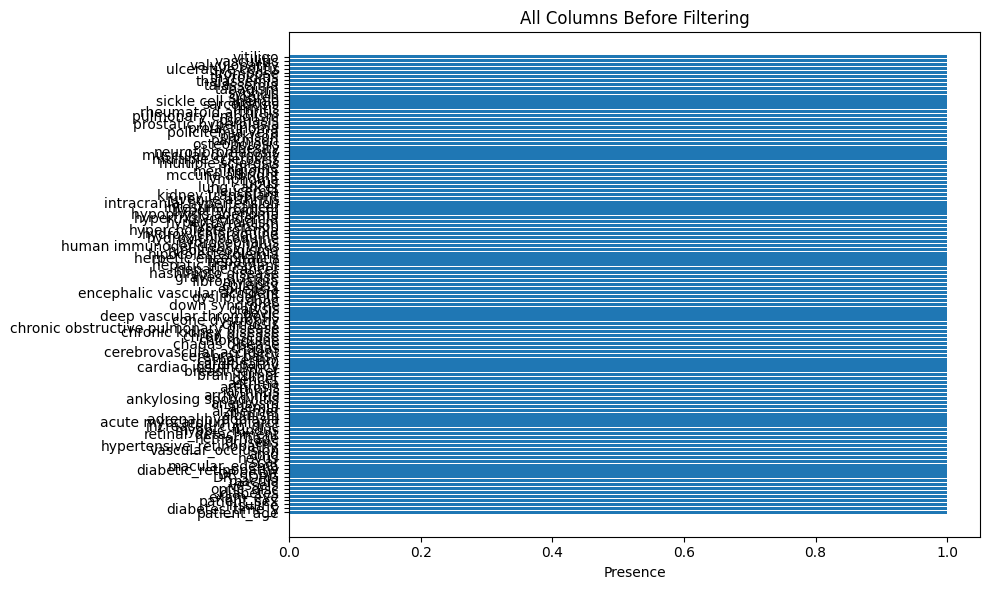

In [81]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(all_columns, [1] * len(all_columns))  # Dummy bars
plt.title("All Columns Before Filtering")
plt.xlabel("Presence")
plt.tight_layout()
plt.show()

**some examples**

In [82]:
dataF_dr_cdv = dataF[kept_columns]
#dataF_dr_cdv = dataF_dr_cdv.drop(columns=['diabetic_retinopathy'])
#print dataF_dr_cdv in one line TOP 5 seprated by ,
print("| ".join(dataF_dr_cdv.head(10).astype(str).apply(lambda row: " , ".join(row), axis=1)))

48 , 12.0 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0| 48 , 12.0 , 1 , 1 , 2 , 1 , 2 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 1 , 0 , 0| 18 , 7.0 , 1 , 2 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0| 18 , 7.0 , 1 , 2 , 2 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0| 22 , 11.0 , 1 , 1 , 1 , 1 , 2 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0| 22 , 11.0 , 1 , 1 , 2 , 1 , 2 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0| 22 , 1.0 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0| 22 , 1.0 , 1 , 1 , 2 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0| 23 , 20.0 , 1 , 1 , 1 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0| 23 , 20.0 , 1 , 1 , 2 , 1 , 1 , 1 , 1 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0 , 0


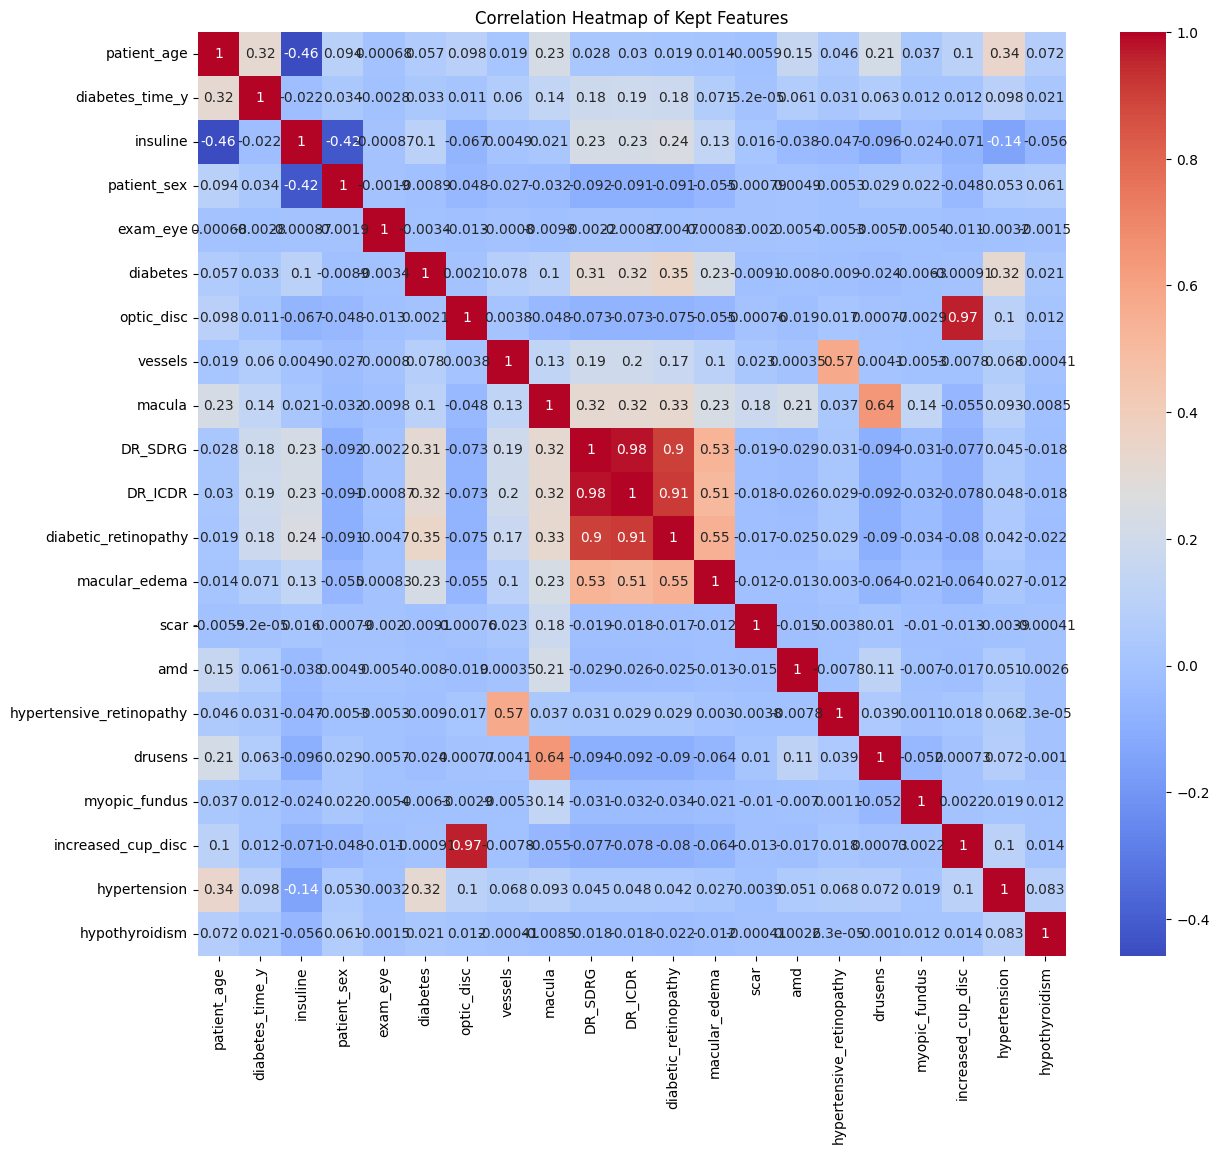

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only kept features from the original DataFrame
kept_features_df = dataF[kept_columns]

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(kept_features_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of Kept Features")
plt.show()


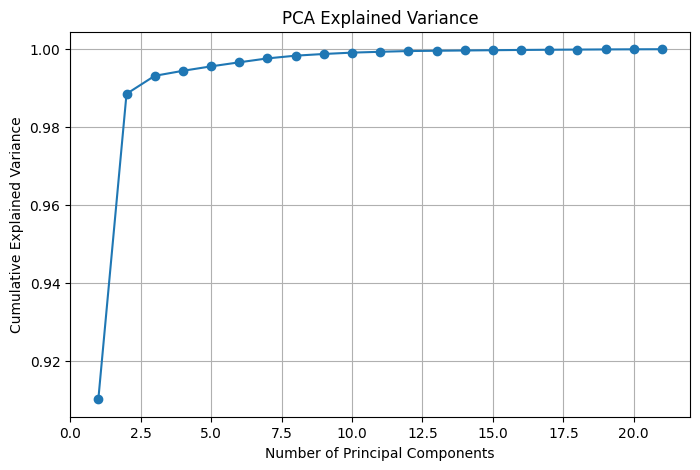

In [84]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Select numeric features from your DataFrame (kept_columns from earlier)
X = dataF[kept_columns].select_dtypes(include='number').dropna()

# Initialize PCA without limiting components to analyze all
pca = PCA()
pca.fit(X)

# Explained variance ratio of each component
explained_variance = pca.explained_variance_ratio_

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o')
plt.title('PCA Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()



In [85]:
print("Total variance retained:", np.sum(pca.explained_variance_ratio_))

Total variance retained: 1.0000000000000002


In [86]:
dataF_PCA = dataF[kept_columns]
#print(dataF_PCA.describe())
#print(dataF_PCA.isnull().values.any())
rows_with_nan = dataF_PCA[dataF_PCA.isnull().any(axis=1)]
print(rows_with_nan)



Empty DataFrame
Columns: [patient_age, diabetes_time_y, insuline, patient_sex, exam_eye, diabetes, optic_disc, vessels, macula, DR_SDRG, DR_ICDR, diabetic_retinopathy, macular_edema, scar, amd, hypertensive_retinopathy, drusens, myopic_fundus, increased_cup_disc, hypertension, hypothyroidism]
Index: []

[0 rows x 21 columns]


# piplines

In [87]:
import torch
import os
import torch.nn as nn
from torchvision import models, transforms
from PIL import Image
from transformers import BertModel
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

* dataset class

In [88]:
class MultiModalDataset(Dataset):
    def __init__(self, clinical_data, image_data, dr_labels, cvr_labels, transform=None):
        self.clinical_data = clinical_data
        self.image_data = image_data
        self.dr_labels = dr_labels
        self.cvr_labels = cvr_labels
        self.transform = transform

    def __len__(self):
        return len(self.clinical_data)

    def __getitem__(self, idx):
        clinical = torch.tensor(self.clinical_data[idx], dtype=torch.float32)
        image = self.image_data[idx]
        if self.transform:
            image = self.transform(image)
        dr_label = torch.tensor(self.dr_labels[idx], dtype=torch.long)
        cvr_label = torch.tensor(self.cvr_labels[idx], dtype=torch.float32)  # regression target
        return clinical, image, dr_label, cvr_label

* class clinical data

In [89]:
# # 1. Clinical Feature Encoder
# class ClinicalFeatureEncoder(nn.Module):
#     def __init__(self, input_dim, hidden_dim):
#         super().__init__()
#         self.fc = nn.Sequential(
#            nn.Linear(input_dim, hidden_dim),
#            nn.BatchNorm1d(hidden_dim),
#            nn.ReLU(),
#            nn.Dropout(0.3),
#            nn.Linear(hidden_dim, hidden_dim),
#            nn.BatchNorm1d(hidden_dim),
#            nn.ReLU(),
#            nn.Dropout(0.5),
#            nn.Linear(hidden_dim, hidden_dim),
#         )
#     # def __init__(self, input_dim, hidden_dim, bottleneck_dim=18):
#     #     super().__init__()
#     #     self.fc = nn.Sequential(
#     #         nn.Linear(input_dim, hidden_dim),
#     #         nn.BatchNorm1d(hidden_dim),
#     #         nn.LeakyReLU(0.1),
#     #         nn.Dropout(0.2),

#     #         nn.Linear(hidden_dim, hidden_dim // 2),
#     #         nn.BatchNorm1d(hidden_dim // 2),
#     #         nn.LeakyReLU(0.1),
#     #         nn.Dropout(0.3),

#     #         nn.Linear(hidden_dim // 2, bottleneck_dim),
#     #         nn.BatchNorm1d(bottleneck_dim),
#     #         nn.LeakyReLU(0.1)
#     #     )

#     def forward(self, x):
#         return self.fc(x)
#   # final embedding
#         # first attempt
#         # self.fc = nn.Sequential(
#         #     nn.Linear(input_dim, hidden_dim),
#         #     nn.ReLU(),
#         #     nn.Dropout(0.2),
#         #     nn.Linear(hidden_dim, hidden_dim)
#         # )
#         # self.fc = nn.Sequential(
#         #     nn.Linear(input_dim, hidden_dim),
#         #     nn.BatchNorm1d(hidden_dim),
#         #     nn.ReLU(),
#         #     nn.Dropout(0.3),

#         #     nn.Linear(hidden_dim, hidden_dim),
#         #     nn.BatchNorm1d(hidden_dim),
#         #     nn.ReLU(),
#         #     nn.Dropout(0.3),

#         #     nn.Linear(hidden_dim, hidden_dim)

In [90]:
class ClinicalFeatureEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.fc = nn.Sequential(
          nn.Linear(input_dim, hidden_dim),
          nn.ReLU(),
          nn.Dropout(0.2),
          nn.Linear(hidden_dim, hidden_dim),
          nn.ReLU(),
          nn.Dropout(0.2),
          nn.Linear(hidden_dim, input_dim)   # reconstruct original 18 features
      )

    def forward(self, x):
        return self.fc(x)

In [91]:
class ResidualBlock(nn.Module):
    def __init__(self, dim, dropout=0.3):
        super().__init__()
        self.block = nn.Sequential(
            nn.Linear(dim, dim),
            nn.BatchNorm1d(dim),
            nn.LeakyReLU(0.1),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return x + self.block(x)  # skip connection

import torch
import torch.nn as nn

class ClinicalAutoencoder(nn.Module):
    def __init__(self, input_dim, hidden_dim=128, bottleneck_dim=32):
        super().__init__()

        # ---- Encoder ----
        self.encoder = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.LeakyReLU(0.1),
            ResidualBlock(hidden_dim, dropout=0.2),

            nn.Linear(hidden_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.LeakyReLU(0.1),
            ResidualBlock(hidden_dim // 2, dropout=0.3),

            nn.Linear(hidden_dim // 2, bottleneck_dim),
            nn.BatchNorm1d(bottleneck_dim),
            nn.LeakyReLU(0.1)
        )

        # ---- Decoder ----
        self.decoder = nn.Sequential(
            nn.Linear(bottleneck_dim, hidden_dim // 2),
            nn.BatchNorm1d(hidden_dim // 2),
            nn.LeakyReLU(0.1),
            ResidualBlock(hidden_dim // 2, dropout=0.3),

            nn.Linear(hidden_dim // 2, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.LeakyReLU(0.1),
            ResidualBlock(hidden_dim, dropout=0.2),

            nn.Linear(hidden_dim, input_dim)  # reconstruction
        )

    def forward(self, x):
        z = self.encoder(x)   # compressed representation
        out = self.decoder(z) # reconstruction
        return out, z


* Retinal Image

In [92]:
class RetinalImageEncoder(nn.Module):
    def __init__(self, output_dim):
        super().__init__()
        base_model = models.resnet18(pretrained=True)
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
        self.fc = nn.Linear(base_model.fc.in_features, output_dim)

    def forward(self, x):
        x = self.feature_extractor(x)
        x = x.view(x.size(0), -1)
        return self.fc(x)

* fusion

In [93]:
class MultimodalClassifier(nn.Module):
    def __init__(self, clinical_dim, image_dim, hidden_dim, num_classes_dr):
        super().__init__()
        self.clinical_encoder = ClinicalFeatureEncoder(clinical_dim, hidden_dim)
        self.image_encoder = RetinalImageEncoder(image_dim) # image_dim in place hidden_dim ?
        self.cross_modal = CrossModalTransformer(embed_dim=hidden_dim)

        self.dr_head = nn.Linear(hidden_dim, num_classes_dr)
        self.cvr_head = nn.Linear(hidden_dim, 1)  # Regression for cardiovascular risk

    def forward(self, clinical, image):
        clinical_embed = self.clinical_encoder(clinical).unsqueeze(1)  # (B, 1, D)
        image_embed = self.image_encoder(image).unsqueeze(1)          # (B, 1, D)

        joint = torch.cat([clinical_embed, image_embed], dim=1)       # (B, 2, D)
        fused = self.cross_modal(joint)                               # (B, 2, D)
        fused_rep = fused.mean(dim=1)                                 # (B, D)

        return self.dr_head(fused_rep), self.cvr_head(fused_rep).squeeze(1)

* model

In [94]:
class CrossModalTransformer(nn.Module):
    def __init__(self, embed_dim, num_heads=4, num_layers=2):
        super().__init__()
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

    def forward(self, x):
        return self.transformer(x)

* excution

# funds images pipeline

*** image Retinal ***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

image_folder_dr = "/content/drive/MyDrive/fundus_photos_all"

Mounted at /content/drive


In [ ]:
# import os
# from PIL import Image
# import numpy as np

# def analyze_image_dimensions(folder_path):
#     widths = []
#     heights = []

#     for root, dirs, files in os.walk(folder_path):
#         for file in files:
#             try:
#                 file_path = os.path.join(root, file)
#                 with Image.open(file_path) as img:
#                     width, height = img.size
#                     widths.append(width)
#                     heights.append(height)
#             except (IOError, OSError):
#                 continue

#     if not widths:
#         print("No valid image files found in the folder.")
#         return None, None

#     min_width = min(widths)
#     min_height = min(heights)
#     max_width = max(widths)
#     max_height = max(heights)
#     avg_width = np.mean(widths)
#     avg_height = np.mean(heights)

#     print("\n=== Image Dimension Analysis ===")
#     print(f"Minimum dimensions: ({min_width}, {min_height})")
#     print(f"Maximum dimensions: ({max_width}, {max_height})")
#     print(f"Average dimensions: ({avg_width:.1f}, {avg_height:.1f})")

#     # Suggested size - using the smallest dimensions that will work for all images
#     suggested_size = (min_width, min_height)

#     # Alternative suggestion - using a size that's 25th percentile of dimensions
#     q25_width = np.percentile(widths, 25)
#     q25_height = np.percentile(heights, 25)
#     suggested_size_25th = (int(q25_width), int(q25_height))

#     print("\n=== Suggested Resize Values ===")
#     print(f"Most compatible (fits all images): transforms.Resize({suggested_size})")
#     print(f"Balanced option (fits 75% of images well): transforms.Resize({suggested_size_25th})")

#     return suggested_size, suggested_size_25th

# # Your folder path
# image_folder_dr = "/content/drive/MyDrive/fundus_photos_all"

# # Run the analysis
# suggested_size, balanced_size = analyze_image_dimensions(image_folder_dr)

In [496]:
encoder = RetinalImageEncoder(output_dim=256)
encoder.eval()#.to("cuda")  # use GPU if available

# Preprocessing (same as before)
preprocess = transforms.Compose([
    transforms.Resize((2420, 1880)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Path to your folder
image_folder_dr = "/content/drive/MyDrive/fundus_photos_all"

# Store results
features_list = []
filenames = []

# Loop over images in the folder
with torch.no_grad():
    for filename in os.listdir(image_folder_dr):
        if filename.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(image_folder_dr, filename)
            image = Image.open(img_path).convert("RGB")
            input_tensor = preprocess(image).unsqueeze(0)#.to("cuda")

            feat = encoder(input_tensor).cpu().numpy().flatten()

            features_list.append(feat)
            filenames.append(filename)

# Convert to DataFrame for easy use
df_dr_features = pd.DataFrame(features_list, index=filenames)

print(df_dr_features.head())

In [ ]:
# Save
df_dr_features.to_parquet("df_dr_features.parquet", index=False)


#df_dr_features = pd.read_parquet("df_dr_features.parquet")


In [ ]:
# Check if there are any NaN values in the NumPy array
nan_check = np.isnan(df_dr_features)

# Sum the NaN values per column (if it's a 2D array)
nan_count_per_column = np.sum(nan_check, axis=0)

# Check if there are any NaN values in the entire array
any_nan = np.isnan(df_dr_features).any()

print(f"NaN values per column: {nan_count_per_column}")
print(f"Does the array contain any NaN values? {any_nan}")

In [ ]:
print(df_dr_features.describe())

In [ ]:
import matplotlib.pyplot as plt
import math

# Suppose your embeddings DataFrame is df_dr_features (samples × features)
num_features = df_dr_features.shape[1]  # e.g. 256
cols = 8  # number of subplots per row
rows = math.ceil(num_features / cols)

fig, axes = plt.subplots(rows, cols, figsize=(20, rows * 2))
axes = axes.flatten()

for i in range(num_features):
    ax = axes[i]
    ax.hist(df_dr_features.iloc[:, i], bins=30, alpha=0.7, color='skyblue')
    ax.set_title(f"F{i}", fontsize=8)
    ax.set_xticks([])  # remove x-axis ticks
    ax.set_yticks([])  # remove y-axis ticks
    ax.set_xlabel("")  # remove x-axis label
    ax.set_ylabel("")  # remove y-axis label

# Remove empty plots if num_features not divisible by cols
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.suptitle("Distribution of Fundus Image Embedding Features", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save in high resolution
plt.savefig("fundus_image_features_histograms.png", dpi=300, bbox_inches='tight')
plt.show()


# clinical pipeline

*** clinical data ***

In [95]:
# # i got bad result


# # Assuming 'kept_columns' are the 18 clinical features you want to use
# X_clinical = dataF[kept_columns].values
# rows = X_clinical.shape[0]

# # Convert to tensor
# X_clinical_tensor = torch.tensor(X_clinical, dtype=torch.float32)

# # Autoencoder parameters
# input_dim = X_clinical_tensor.shape[1]  # 18 features
# hidden_dim = 32
# bottleneck_dim = 32  # compressed features

# # Initialize autoencoder
# autoencoder = ClinicalAutoencoder(input_dim, hidden_dim, bottleneck_dim)

# # Forward pass using the **real clinical data**
# embeddings, reconstruction = autoencoder(X_clinical_tensor)

# print("Embeddings shape:", embeddings.shape)        # (num_samples, bottleneck_dim)
# print("Reconstruction shape:", reconstruction.shape)  # (num_samples, 18)

# # Convert embeddings to DataFrame
# embeddings_np = embeddings.detach().numpy()
# column_names = [f'clinical_feat_{i+1}' for i in range(embeddings_np.shape[1])]
# df_clinical_features_e = pd.DataFrame(embeddings_np, columns=column_names)

# print(df_clinical_features_e.head())


In [96]:
# import matplotlib.pyplot as plt

# # Plot histograms for ALL embedding features
# df_clinical_features_e.hist(figsize=(20, 20), bins=30)

# # Add a global title
# plt.suptitle("Distribution of All Clinical Embedding Features", fontsize=18)

# plt.tight_layout(rect=[0, 0, 1, 0.97])  # adjust so title fits
# plt.show()


In [97]:
# X_clinical = dataF[kept_columns].values
# rows = dataF[kept_columns].shape[0]

# X_clinical_tensor = torch.tensor(X_clinical, dtype=torch.float32)

# input_dim = X_clinical_tensor.shape[1]  # 18 features
# hidden_dim = 36  # choose embedding size
# bottleneck_dim = 18  # compressed features
# clinical_encoder = ClinicalFeatureEncoder(input_dim, hidden_dim)

# clinical_features = clinical_encoder(X_clinical_tensor)
# print(clinical_features.shape)


# # convert into dataFrame

# clinical_features_np = clinical_features.detach().numpy()

# # Optional: name the columns
# column_names = [f'clinical_feat_{i+1}' for i in range(clinical_features_np.shape[1])]

# df_clinical_features = pd.DataFrame(clinical_features_np, columns=column_names)

# print(df_clinical_features.head())


In [98]:
from sklearn.preprocessing import StandardScaler
from torch.utils.data import TensorDataset, DataLoader

X_clinical = dataF[kept_columns].values
rows = dataF[kept_columns].shape[0]

scaler = StandardScaler()
X_clinical_scaled = scaler.fit_transform(X_clinical)

X_clinical_tensor = torch.tensor(X_clinical_scaled, dtype=torch.float32)

input_dim = X_clinical_tensor.shape[1]  # 18 features

hidden_dim = input_dim*4

bottleneck_dim = int(np.sqrt(input_dim)) # strong compression rule

pipeline_cvr = ClinicalFeatureEncoder(input_dim, hidden_dim)
optimizer = torch.optim.Adam(pipeline_cvr.parameters(), lr=1e-3)
criterion = nn.MSELoss()


In [99]:
X_clinical_tensor.shape

torch.Size([16266, 21])

In [112]:
epochs = 320
for epoch in range(epochs):
    optimizer.zero_grad()
    x_hat = pipeline_cvr(X_clinical_tensor)
    loss = criterion(x_hat, X_clinical_tensor)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 10, Loss: 0.1421
Epoch 20, Loss: 0.1409
Epoch 30, Loss: 0.1410
Epoch 40, Loss: 0.1401
Epoch 50, Loss: 0.1385


In [113]:
with torch.no_grad():
    x_hat = pipeline_cvr(X_clinical_tensor)
    num = torch.sum((X_clinical_tensor - x_hat) ** 2)           # SSE
    den = torch.sum((X_clinical_tensor - X_clinical_tensor.mean(0)) ** 2)       # Total variance
    R2 = 1 - num / den
    print("Explained variance (R^2):", R2.item())

Explained variance (R^2): 0.8613537549972534


5️⃣ Why it works

Hidden dimension increased (input_dim*4) → more capacity to learn feature correlations.

Dropout prevents overfitting but is not too high (0.2).

ReLU activations help learn nonlinear relationships.

StandardScaler ensures all features contribute equally.

Enough epochs (150) → network converges.

In [102]:
x_hat_cvr = scaler.inverse_transform(x_hat)
df_reconstructed = pd.DataFrame(x_hat_cvr)
print(df_reconstructed.head())

          0          1         2         3         4         5         6   \
0  58.823055  11.900399  0.706196  1.044041  1.253402  0.721606  1.219283   
1  52.329129  12.571405  0.920728  0.980501  1.800400  0.935541  1.940241   
2  33.675102   9.390410  0.755680  1.969407  1.262082  0.570396  1.130261   
3  22.739282   6.945339  0.873720  2.054865  2.192834  0.952853  1.089125   
4  20.979702   9.693365  1.145651  0.619566  1.253145  0.883328  1.570049   

         7         8         9   ...        11        12        13        14  \
0  0.927233  0.923288 -0.114952  ... -0.011494  0.069704 -0.000331  0.012171   
1  0.832915  0.920256  0.122039  ...  0.043535  0.022890  0.071545 -0.054810   
2  1.000187  1.073517 -0.001473  ...  0.031633 -0.030849  0.023808  0.053834   
3  1.071699  0.786887 -0.095561  ... -0.095592  0.022196  0.013480 -0.013539   
4  1.119023  0.711244 -0.358406  ... -0.055649  0.053678  0.024121 -0.022592   

         15        16        17        18        19     

In [103]:
import numpy as np

# Check if there are any NaN values in the NumPy array
nan_check = np.isnan(X_clinical)

# Sum the NaN values per column (if it's a 2D array)
nan_count_per_column = np.sum(nan_check, axis=0)

# Check if there are any NaN values in the entire array
any_nan = np.isnan(X_clinical).any()

print(f"NaN values per column: {nan_count_per_column}")
print(f"Does the array contain any NaN values? {any_nan}")

NaN values per column: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Does the array contain any NaN values? False


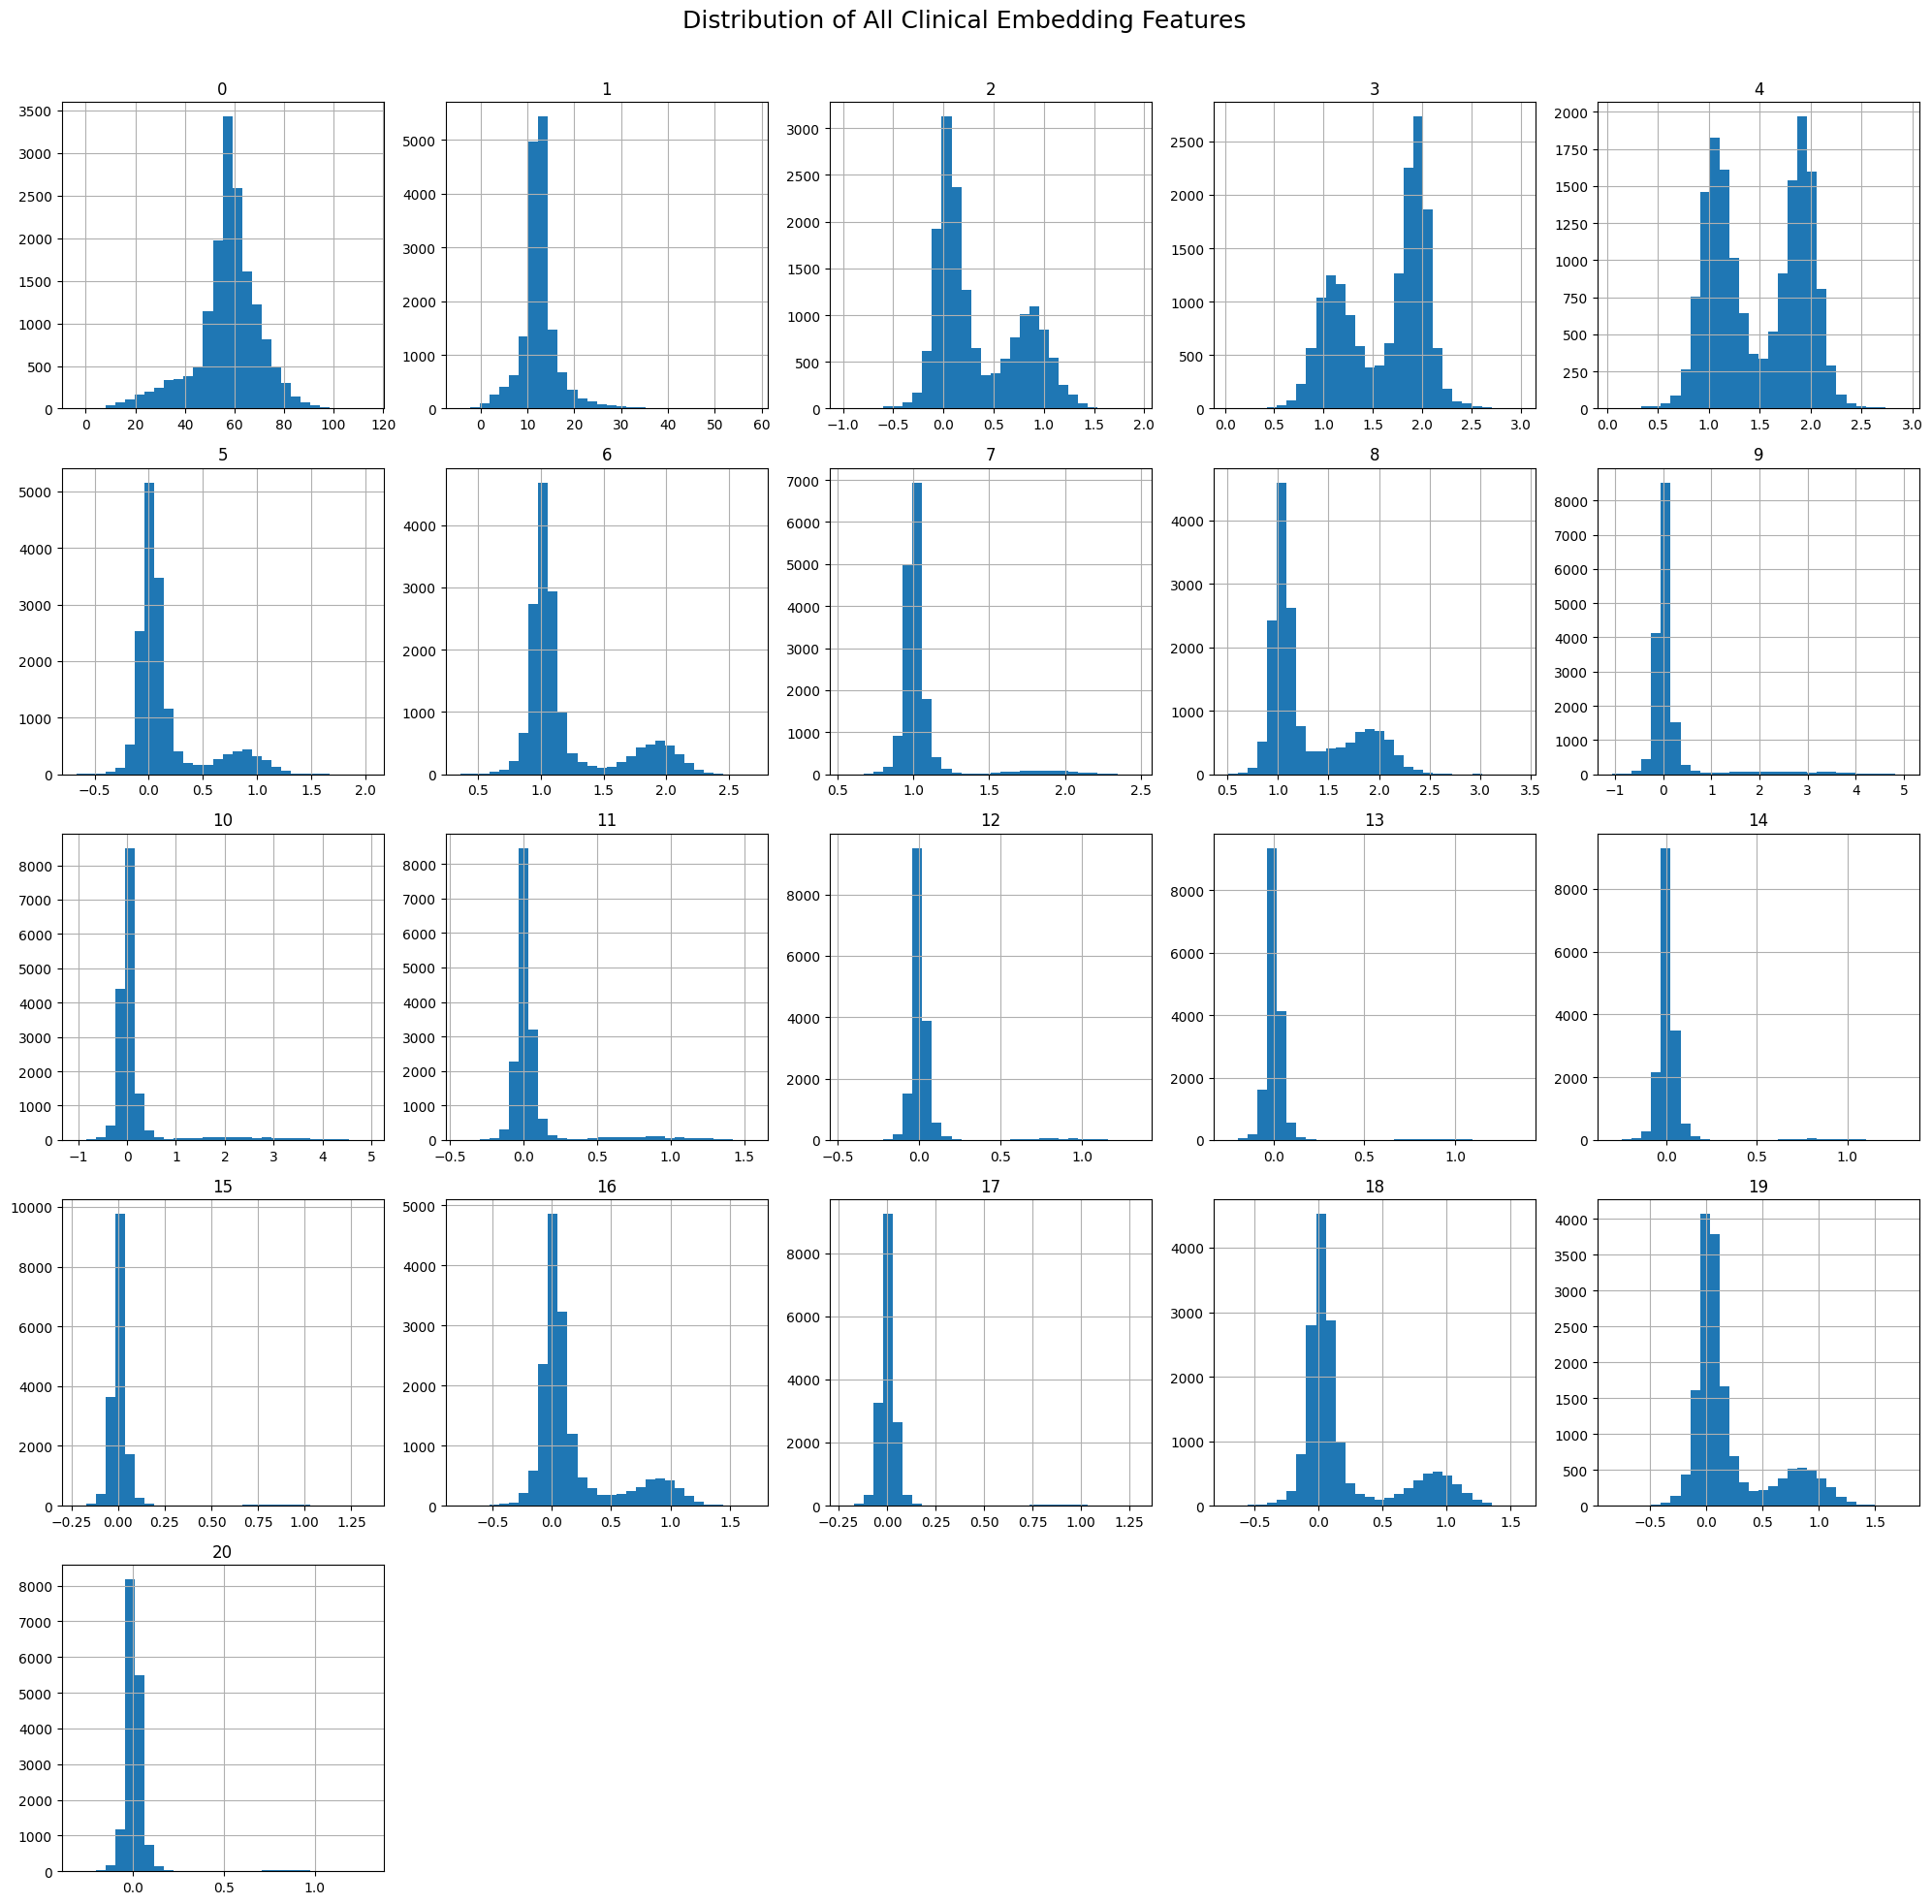

In [104]:
import matplotlib.pyplot as plt

# Plot histograms for ALL embedding features
df_reconstructed.hist(figsize=(20, 20), bins=30)

# Add a global title
plt.suptitle("Distribution of All Clinical Embedding Features", fontsize=18)

plt.tight_layout(rect=[0, 0, 1, 0.97])  # adjust so title fits
plt.show()


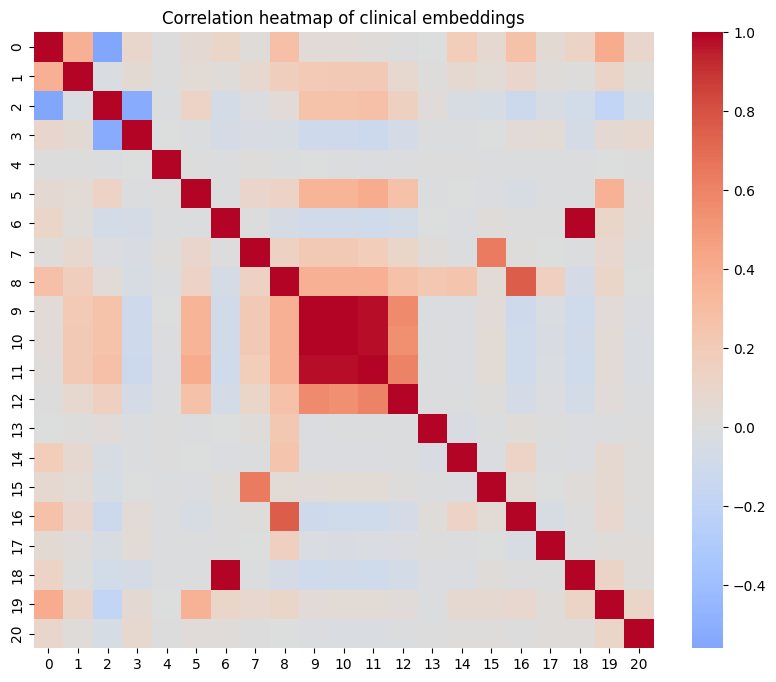

In [105]:
import seaborn as sns

corr = df_reconstructed.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation heatmap of clinical embeddings")
plt.show()

# corr = df_clinical_features_e.corr()
# plt.figure(figsize=(10, 8))
# sns.heatmap(corr, cmap="coolwarm", center=0)
# plt.title("Correlation heatmap of clinical embeddings")
# plt.show()


In [106]:
#df_clinical_features.isna().sum() 0 null values

In [107]:
from sklearn.decomposition import PCA

# Keep 2 components just for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(df_reconstructed)

# Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Cumulative variance:", pca.explained_variance_ratio_.sum())



# X_pca_new = pca.fit_transform(df_clinical_features_new)

# # Explained variance ratio
# print("Explained variance ratio:", pca.explained_variance_ratio_)
# print("Cumulative variance:", pca.explained_variance_ratio_.sum())





# plt.scatter(reduced[:,0], reduced[:,1], alpha=0.7)
# plt.title("PCA of clinical embeddings")
# plt.xlabel("PC1")
# plt.ylabel("PC2")
# plt.show()

Explained variance ratio: [0.91090993 0.07686481]
Cumulative variance: 0.9877747397614173


# other

In [ ]:
dataF.count()

,0
patient_age,16266
diabetes_time_y,10654
insuline,16266
patient_sex,16266
exam_eye,16266
...,...
trombose,16266
ulcerative colitis,16266
valvulopathy,16266
vasculitis,16266


Modeling part

In [ ]:
#get the image_id and the DR columns
dataF_img_dr = pd.read_csv('/content/labels_brset.csv', sep = ',')
dataF_img_dr = dataF_img_dr[['image_id', 'diabetic_retinopathy']]
print(dataF_img_dr)

       image_id  diabetic_retinopathy
0      img00001                     0
1      img00002                     0
2      img00003                     0
3      img00004                     0
4      img00005                     0
...         ...                   ...
16261  img16262                     1
16262  img16263                     0
16263  img16264                     0
16264  img16265                     0
16265  img16266                     0

[16266 rows x 2 columns]


In [ ]:
# Multimodal Transformer for Cardiovascular Risk and DR Severity Prediction

import torch
import torch.nn as nn
from torchvision import models, transforms
from transformers import BertModel
from torch.utils.data import DataLoader, Dataset
import torch.nn.functional as F

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from PIL import Image
import os
import numpy as np
from sklearn.decomposition import PCA

import os
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from PIL import Image

# 1. Clinical Feature Encoder
class ClinicalFeatureEncoder(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(hidden_dim, hidden_dim)
        )

    def forward(self, x):
        return self.fc(x)

# 2. Retinal Image Encoder (ResNet18-based)
# class RetinalImageEncoder(nn.Module):
#     def __init__(self, output_dim=256, pca_components=None):
#         super().__init__()
#         base_model = models.resnet18(pretrained=True)
#         self.feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
#         self.fc = nn.Linear(base_model.fc.in_features, output_dim)

#         self.transform = transforms.Compose([
#             transforms.Resize((224, 224)),
#             transforms.ToTensor(),
#             transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                                  std=[0.229, 0.224, 0.225])
#         ])

#         self.use_pca = pca_components is not None
#         self.pca = PCA(n_components=pca_components) if self.use_pca else None

#     def forward(self, x):
#         with torch.no_grad():
#             x = self.feature_extractor(x)
#             x = x.view(x.size(0), -1)
#         return self.fc(x)

#     def extract_features_from_folder(self, image_folder):
#         features = []
#         for filename in os.listdir(image_folder):
#             if filename.lower().endswith((".jpg", ".jpeg", ".png")):
#                 path = os.path.join(image_folder, filename)
#                 img = Image.open(path).convert("RGB")
#                 img_tensor = self.transform(img)#.unsqueeze(0)  # Add batch dim
#                 with torch.no_grad():
#                     feat = self.feature_extractor(img_tensor)#.squeeze().numpy()
#                 features.append(feat)
#         features = np.array(features)

#         if self.use_pca:
#             features = self.pca.fit_transform(features)
#         return features

#     def evaluate(self, image_folder, df_labels):
#         """
#         image_folder: Path to folder containing images
#         df_labels: Pandas DataFrame with columns ['image_id', 'diabetic_retinopathy']
#         """
#         # Ensure filenames match
#         df_labels['filename'] = df_labels['image_id'].astype(str) + ".jpg"

#         # Extract features for matching images
#         X = []
#         y = []
#         for _, row in df_labels.iterrows():
#             img_path = os.path.join(image_folder, row['filename'])
#             if os.path.exists(img_path):
#                 img = Image.open(img_path).convert("RGB")
#                 img_tensor = self.transform(img).unsqueeze(0)
#                 with torch.no_grad():
#                     feat = self.feature_extractor(img_tensor).squeeze().numpy()
#                 X.append(feat)
#                 y.append(row['diabetic_retinopathy'])

#         X = np.array(X)
#         y = np.array(y)

#         # Apply PCA if enabled
#         # if self.use_pca:
#         #     X = self.pca.fit_transform(X)

#         # Train simple classifier (Logistic Regression)
#         clf = LogisticRegression(max_iter=10000)

#         clf.fit(X, y)
#         preds = clf.predict(X)

#         # Compute metrics
#         acc = accuracy_score(y, preds)
#         prec = precision_score(y, preds)
#         rec = recall_score(y, preds)
#         f1 = f1_score(y, preds)

#         print(f"Accuracy: {acc:.4f}")
#         print(f"Precision: {prec:.4f}")
#         print(f"Recall: {rec:.4f}")
#         print(f"F1-score: {f1:.4f}")

#         return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

class RetinalImageEncoder(nn.Module):
    def __init__(self, image_folder, df_labels, num_classes=2, output_dim=256):
        super().__init__()
        self.image_folder = image_folder
        self.df_labels = df_labels
        self.num_classes = num_classes

        # ResNet18 backbone
        base_model = models.resnet18(pretrained=True)
        # Feature extractor for other tasks
        self.feature_extractor = nn.Sequential(*list(base_model.children())[:-1])
        # Classification layer
        self.fc = nn.Linear(base_model.fc.in_features, num_classes)

        # Image preprocessing
        self.transform = transforms.Compose([
            transforms.Resize((224, 224)),
            transforms.ToTensor(),
            transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])
        ])

    # Forward pass: returns both class output and features
    def forward(self, x):
        features = self.feature_extractor(x)
        features = features.view(features.size(0), -1)
        out = self.fc(features)
        return out, features

    # Internal Dataset class
    def _get_dataset(self, df):
        class RetinalDataset(Dataset):
            def __init__(self, df, image_folder, transform):
                self.df = df
                self.image_folder = image_folder
                self.transform = transform
                # Keep only rows where the image file exists
                self.df = self.df[self.df["image_id"].apply(
                      lambda x: os.path.exists(os.path.join(self.image_folder, str(x)+".jpg"))
                )].reset_index(drop=True)

            def __len__(self):
                return len(self.df)

            def __getitem__(self, idx):
                row = self.df.iloc[idx]
                img_path = os.path.join(self.image_folder, row["image_id"] + ".jpg")
                image = Image.open(img_path).convert("RGB")
                if self.transform:
                    image = self.transform(image)
                label = int(row["diabetic_retinopathy"])
                return image, label

        return RetinalDataset(df, self.image_folder, self.transform)

    # Train method
    def train_model(self, epochs=5, batch_size=32, lr=1e-4):
        train_df, val_df = train_test_split(
            self.df_labels, test_size=0.2,
            stratify=self.df_labels["diabetic_retinopathy"],
            random_state=42
        )

        train_loader = DataLoader(self._get_dataset(train_df), batch_size=batch_size, shuffle=True)
        val_loader = DataLoader(self._get_dataset(val_df), batch_size=batch_size, shuffle=False)

        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(device)

        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(self.parameters(), lr=lr)

        best_acc = 0.0
        for epoch in range(epochs):
            # Training
            self.train()
            running_loss = 0.0
            for images, labels in train_loader:
                images, labels = images.to(device), labels.to(device)
                optimizer.zero_grad()
                outputs, _ = self(images)
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()

            # Validation
            self.eval()
            correct, total = 0, 0
            with torch.no_grad():
                for images, labels in val_loader:
                    images, labels = images.to(device), labels.to(device)
                    outputs, _ = self(images)
                    _, preds = torch.max(outputs, 1)
                    total += labels.size(0)
                    correct += (preds == labels).sum().item()

            val_acc = correct / total
            print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(train_loader):.4f} - Val Acc: {val_acc:.4f}")

            # Save best model
            if val_acc > best_acc:
                best_acc = val_acc
                torch.save(self.state_dict(), "best_resnet18.pth")
                print("✅ Saved Best Model")

        print(f"Training complete. Best validation accuracy: {best_acc:.4f}")

    # Evaluate method
    def evaluate(self, test_df):
        device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
        self.to(device)
        self.eval()

        test_loader = DataLoader(self._get_dataset(test_df), batch_size=32, shuffle=False)
        all_preds, all_labels = [], []

        with torch.no_grad():
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                outputs, _ = self(images)
                _, preds = torch.max(outputs, 1)
                all_preds.extend(preds.cpu().numpy())
                all_labels.extend(labels.cpu().numpy())

        acc = accuracy_score(all_labels, all_preds)
        prec = precision_score(all_labels, all_preds)
        rec = recall_score(all_labels, all_preds)
        f1 = f1_score(all_labels, all_preds)

        print(f"Accuracy: {acc:.4f}")
        print(f"Precision: {prec:.4f}")
        print(f"Recall: {rec:.4f}")
        print(f"F1-score: {f1:.4f}")

        return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

# 3. Cross-Modal Transformer
class CrossModalTransformer(nn.Module):
    def __init__(self, embed_dim, num_heads=4, num_layers=2):
        super().__init__()
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

    def forward(self, x):
        return self.transformer(x)

# 4. Multimodal Classifier
class MultimodalClassifier(nn.Module):
    def __init__(self, clinical_dim, image_dim, hidden_dim, num_classes_dr):
        super().__init__()
        self.clinical_encoder = ClinicalFeatureEncoder(clinical_dim, hidden_dim)
        self.image_encoder = RetinalImageEncoder(image_dim) # image_dim in place hidden_dim ?
        self.cross_modal = CrossModalTransformer(embed_dim=hidden_dim)

        self.dr_head = nn.Linear(hidden_dim, num_classes_dr)
        self.cvr_head = nn.Linear(hidden_dim, 1)  # Regression for cardiovascular risk

    def forward(self, clinical, image):
        clinical_embed = self.clinical_encoder(clinical)#.unsqueeze(1)  # (B, 1, D)
        image_embed = self.image_encoder(image)#.unsqueeze(1)          # (B, 1, D)

        joint = torch.cat([clinical_embed, image_embed], dim=1)       # (B, 2, D)
        fused = self.cross_modal(joint)                               # (B, 2, D)
        fused_rep = fused.mean(dim=1)                                 # (B, D)

        return self.dr_head(fused_rep), self.cvr_head(fused_rep).squeeze(1)

# 5. Custom Dataset (example)
class MultiModalDataset(Dataset):
    def __init__(self, clinical_data, image_data, dr_labels, cvr_labels, transform=None):
        self.clinical_data = clinical_data
        self.image_data = image_data
        self.dr_labels = dr_labels
        self.cvr_labels = cvr_labels
        self.transform = transform

    def __len__(self):
        return len(self.clinical_data)

    def __getitem__(self, idx):
        clinical = torch.tensor(self.clinical_data[idx], dtype=torch.float32)
        image = self.image_data[idx]
        if self.transform:
            image = self.transform(image)
        dr_label = torch.tensor(self.dr_labels[idx], dtype=torch.long)
        cvr_label = torch.tensor(self.cvr_labels[idx], dtype=torch.float32)  # regression target
        return clinical, image, dr_label, cvr_label

# 6. Training Routine

def train(model, dataloader, optimizer, criterion_dr, criterion_cvr, device):
    model.train()
    total_loss = 0
    for clinical, image, dr_label, cvr_label in dataloader:
        clinical, image = clinical.to(device), image.to(device)
        dr_label, cvr_label = dr_label.to(device), cvr_label.to(device)

        dr_pred, cvr_pred = model(clinical, image)
        loss = criterion_dr(dr_pred, dr_label) + criterion_cvr(cvr_pred, cvr_label)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    return total_loss / len(dataloader)

# 7. Evaluation Routine

def evaluate(model, dataloader, criterion_dr, criterion_cvr, device):
    model.eval()
    total_loss = 0
    correct_dr = 0
    total = 0
    mse_cvr = 0
    with torch.no_grad():
        for clinical, image, dr_label, cvr_label in dataloader:
            clinical, image = clinical.to(device), image.to(device)
            dr_label, cvr_label = dr_label.to(device), cvr_label.to(device)

            dr_pred, cvr_pred = model(clinical, image)
            loss = criterion_dr(dr_pred, dr_label) + criterion_cvr(cvr_pred, cvr_label)
            total_loss += loss.item()

            correct_dr += (dr_pred.argmax(1) == dr_label).sum().item()
            mse_cvr += F.mse_loss(cvr_pred, cvr_label, reduction='sum').item()
            total += dr_label.size(0)

    avg_mse_cvr = mse_cvr / total
    return total_loss / len(dataloader), correct_dr / total, avg_mse_cvr


**custom object**


**clinical data**

In [ ]:
dataF_PCA = dataF[kept_columns]
print(dataF_PCA.shape)

(16266, 18)


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataF_PCA.values)

encoder = ClinicalFeatureEncoder(input_dim=18, hidden_dim=256)
encoder.eval()

with torch.no_grad():
    features = encoder(torch.tensor(X_scaled, dtype=torch.float32))
    # clinical_features = encoder(inputs).numpy()  # shape: (N, 256)

# # Step 3: Apply PCA
# pca = PCA(n_components=256)
# clinical_features_pca = pca.fit_transform(clinical_features)

# # Step 4: Show explained variance ratio
# explained_variance = pca.explained_variance_ratio_
# cumulative_variance = np.cumsum(explained_variance)

# # Print top values
# print("Top 10 PCA component variance ratios:")
# print(explained_variance[:10])

# print("\nCumulative variance explained by top 128 components:")
# print(cumulative_variance[127])  # for first 128 dims

In [ ]:
print(features.shape)

torch.Size([16266, 256])


**image data (ResNet18-based)**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
image_folder_dr = "/content/drive/MyDrive/fundus_photos_all"

# wrong model

In [ ]:
import os
import pandas as pd

# Your folder with images
#image_folder_dr = "/content/drive/MyDrive/fundus_photos_all"

# Your DataFrame with image IDs
# It should have a column "image_id" (without .jpg)
df = dataF_img_dr

# Create the full filenames expected
expected_files = set(df["image_id"].astype(str) + ".jpg")

# List all actual files in the folder
actual_files = set([f for f in os.listdir(image_folder_dr) if f.lower().endswith(".jpg")])

# Find missing files
missing_files = expected_files - actual_files

print(f"Number of missing files: {len(missing_files)}")
print("Missing files:", missing_files)

Number of missing files: 0
Missing files: set()


In [ ]:
#!ls "/content/drive/MyDrive/fundus_photos/"

In [ ]:
# encoder = RetinalImageEncoder(output_dim=(256), pca_components=128)
# #features = encoder.extract_features_from_folder(image_folder)
# metrics = encoder.evaluate(image_folder, dataF_img_dr)
# print(metrics)



from sklearn.model_selection import train_test_split

# Split the data into train and test
train_df, test_df = train_test_split(
    dataF_img_dr,
    test_size=0.2,  # 20% for evaluation
    stratify=dataF_img_dr["diabetic_retinopathy"],  # keep proportion of 0/1
    random_state=42
)

# Create the model using the training data
model = RetinalImageEncoder(
    image_folder=image_folder_dr,
    df_labels=train_df,
    num_classes=2
)

# Train the model
model.train_model(epochs=10, batch_size=32, lr=1e-4)

# Evaluate on the test set
test_results = model.evaluate(test_df)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 170MB/s]


Epoch 1/10 - Loss: 0.2103 - Val Acc: 0.9499
✅ Saved Best Model
Epoch 2/10 - Loss: 0.1018 - Val Acc: 0.9531
✅ Saved Best Model
Epoch 3/10 - Loss: 0.0444 - Val Acc: 0.9011
Epoch 4/10 - Loss: 0.0256 - Val Acc: 0.9487
Epoch 5/10 - Loss: 0.0116 - Val Acc: 0.9531
Epoch 6/10 - Loss: 0.0062 - Val Acc: 0.9556
✅ Saved Best Model
Epoch 7/10 - Loss: 0.0078 - Val Acc: 0.9524
Epoch 8/10 - Loss: 0.0168 - Val Acc: 0.9581
✅ Saved Best Model
Epoch 9/10 - Loss: 0.0234 - Val Acc: 0.9556
Epoch 10/10 - Loss: 0.0062 - Val Acc: 0.9556
Training complete. Best validation accuracy: 0.9581
Accuracy: 0.9610
Precision: 0.7978
Recall: 0.5504
F1-score: 0.6514


**with PCA**

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
train_df, test_df = train_test_split(
    dataF_img_dr,
    test_size=0.2,
    stratify=dataF_img_dr["diabetic_retinopathy"],
    random_state=42
)

# Create the model (with PCA if desired, e.g., 100 components)
model = RetinalImageEncoder(
    image_folder=image_folder_dr,
    df_labels=train_df,
    num_classes=2,
    output_dim=256,
    pca_components=100  # set None if you don't want PCA
)

# Optional: fit PCA on training features
train_loader = torch.utils.data.DataLoader(
    model._get_dataset(train_df),
    batch_size=32,
    shuffle=False
)
if model.pca is not None:
    model.fit_pca(train_loader)

# Train the model
model.train_model(epochs=10, batch_size=32, lr=1e-4)

# Evaluate on the test set
test_results = model.evaluate(test_df)


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x100 and 512x2)

In [ ]:
#count features
print(features.shape)

torch.Size([16266, 256])


In [ ]:
plt.figure(figsize=(10, 4))
plt.bar(range(1, len(encoder.pca.explained_variance_ratio_)+1), encoder.pca.explained_variance_ratio_, alpha=0.7, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Explained Variance per Component')
plt.grid(True)
plt.show()

AttributeError: 'ClinicalFeatureEncoder' object has no attribute 'pca'

<Figure size 1000x400 with 0 Axes>

In [ ]:
plt.figure(figsize=(10, 4))
plt.plot(np.cumsum(encoder.pca.explained_variance_ratio_), marker='o', linestyle='--', color='skyblue')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.axhline(y=0.9, color='r', linestyle='--', label='90% Variance')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
print(encoder.pca.explained_variance_ratio_)

In [ ]:
from sklearn.decomposition import PCA
import numpy as np

# Safe because 128 is the feature dimension
pca = PCA(n_components=128)
image_features_pca = pca.fit_transform(features)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

print("Image PCA - Top 10 component ratios:")
print(explained_variance[:10])

print(f"\nCumulative variance of top 128 components:")
print(cumulative_variance[-1])

**cross modal**

In [ ]:
class CrossModalTransformer(nn.Module):
    def __init__(self, embed_dim, num_heads=4, num_layers=2):
        super().__init__()
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim, nhead=num_heads, batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

    def forward(self, x):
        return self.transformer(x)
class MultiModalDataset(Dataset):
    def __init__(self, clinical_features, image_features, dr_labels, cvr_labels):
        """
        Args:
            clinical_features: numpy array or tensor of shape (N, D)
            image_features: numpy array or tensor of shape (N, D)
            dr_labels: array/tensor of shape (N,) (binary 0/1)
            cvr_labels: array/tensor of shape (N,) (float)
        """
        self.clinical_features = torch.tensor(clinical_features, dtype=torch.float32)
        self.image_features = torch.tensor(image_features, dtype=torch.float32)
        self.dr_labels = torch.tensor(dr_labels, dtype=torch.float32)  # float for BCE
        self.cvr_labels = torch.tensor(cvr_labels, dtype=torch.float32)

    def __len__(self):
        return len(self.clinical_features)

    def __getitem__(self, idx):
        clinical = self.clinical_features[idx]
        image = self.image_features[idx]
        dr_label = self.dr_labels[idx]
        cvr_label = self.cvr_labels[idx]
        return clinical, image, dr_label, cvr_label


# Example of how to use the dataset and transformer

if __name__ == "__main__":
    # Dummy features
    N = 5
    embed_dim = 256

    clinical_features = torch.rand(N, embed_dim)
    image_features = torch.rand(N, embed_dim)
    dr_labels = torch.randint(0, 2, (N,)).float()
    cvr_labels = torch.rand(N)

    dataset = MultiModalDataset(clinical_features, image_features, dr_labels, cvr_labels)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=2)

    transformer = CrossModalTransformer(embed_dim=embed_dim)

    for clinical, image, dr_label, cvr_label in dataloader:
        # Add sequence dim (batch, seq_len=2, embed_dim)
        x = torch.stack([clinical, image], dim=1)
        out = transformer(x)  # shape (batch, seq_len=2, embed_dim)
        print(out.shape)
        print(out)
        break

torch.Size([2, 2, 256])
tensor([[[ 1.2056, -0.4369,  0.3260,  ..., -2.1906, -0.3517, -1.2737],
         [-0.4303, -1.0520,  0.3703,  ..., -1.8119,  0.5193, -1.0522]],

        [[-0.2680,  1.4936, -0.0834,  ...,  0.1761, -1.2327,  0.0262],
         [-0.1036,  0.0908, -1.0107,  ..., -0.1452,  0.6628,  0.9139]]],
       grad_fn=<NativeLayerNormBackward0>)


In [ ]:
print(out)

In [ ]:
for i in range(5):
    clinical, image, dr_label, cvr_label = dataset[i]
    print(f"Sample {i}:")
    print(f"Clinical features shape: {clinical.shape}")
    print(f"Image features shape: {image.shape}")
    print(f"DR label: {dr_label.item()}")
    print(f"CVR label: {cvr_label.item()}")
    print("-" * 30)

In [ ]:
#the 2 first lines of dataF in one line
print(dataF_PCA.head(2).to_string(index=False))

In [ ]:
print(dataF_PCA.shape)

In [ ]:
import gradio as gr
import torch
import torchvision.transforms as transforms
from PIL import Image
from torchvision import models

# Your model classes must be defined or imported before this

# 1. Instantiate and load your full model
model = MultimodalClassifier(clinical_dim=18, image_dim=256, hidden_dim=256, num_classes_dr=2)
model.eval()

# 2. Extract parts for prediction
clinical_encoder = model.clinical_encoder
image_encoder = model.image_encoder
transformer = model.cross_modal
dr_head = model.dr_head
cvr_head = model.cvr_head

# Image preprocessing - same as training
image_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

def predict(clinical_str, img):
    try:
        # 1. Parse and convert clinical input string to tensor
        clinical_values = [float(x.strip()) for x in clinical_str.split(",")]
        if len(clinical_values) != 18:
            return "Error: Clinical input must have exactly 18 values.", None

        clinical_raw = torch.tensor(clinical_values, dtype=torch.float32).unsqueeze(0)

        # 2. Preprocess image
        img_t = image_transform(img).unsqueeze(0)

        # 3. Encode clinical and image features separately
        clinical_feat = clinical_encoder(clinical_raw)    # shape (1, embed_dim)
        image_feat = image_encoder(img_t)                  # shape (1, embed_dim)

        # 4. Stack and fuse with transformer
        x = torch.stack([clinical_feat.squeeze(0), image_feat.squeeze(0)], dim=0).unsqueeze(0)  # (1,2,embed_dim)
        fused = transformer(x)  # (1,2,embed_dim)

        fused_rep = fused.mean(dim=1)  # (1, embed_dim)

        # 5. Pass fused representation to output heads
        dr_logits = dr_head(fused_rep)
        cvr_reg = cvr_head(fused_rep).squeeze(1)

        # 6. Output postprocessing
        dr_prob = torch.softmax(dr_logits, dim=1)
        dr_pred = dr_prob.argmax(dim=1).item()
        cvr_pct = cvr_reg.item() * 100

        return dr_pred, round(cvr_pct, 2)

    except Exception as e:
        return f"Error: {str(e)}", None

clinical_input = gr.Textbox(
    label="Clinical Data (comma separated, 18 values)",
    placeholder="48, 12.0, 1, 1, 1, ..., 0"
)

image_input = gr.Image(
    type="pil",
    label="Upload Retinal Image"
)

dr_output = gr.Label(num_top_classes=2, label="DR Prediction (0: No, 1: Yes)")

cvr_output = gr.Textbox(label="Cardiovascular Risk (%)")

iface = gr.Interface(
    fn=predict,
    inputs=[clinical_input, image_input],
    outputs=[dr_output, cvr_output],
    title="Multimodal DR and CVR Predictor",
    description="Upload clinical data and a retinal image to predict diabetic retinopathy (DR) and cardiovascular risk (CVR)."
)

iface.launch()


**PCA for images**

In [ ]:
# import torch
# import torchvision.models as models
# import torchvision.transforms as transforms
# from PIL import Image
# import os
# from sklearn.decomposition import PCA
# import numpy as np

# # Use pretrained ResNet18, remove final layer
# resnet = models.resnet18(pretrained=True)
# resnet = torch.nn.Sequential(*list(resnet.children())[:-1])  # remove FC
# resnet.eval()



# transform = transforms.Compose([
#     transforms.Resize((224, 224)),
#     transforms.ToTensor(),
#     transforms.Normalize(mean=[0.485, 0.456, 0.406],
#                          std=[0.229, 0.224, 0.225])
# ])



# def extract_features(image_folder):
#     features = []
#     for filename in os.listdir(image_folder):
#         if filename.endswith(".jpg"):
#             path = os.path.join(image_folder, filename)
#             img = Image.open(path).convert("RGB")
#             img_tensor = transform(img).unsqueeze(0)  # Add batch dim
#             with torch.no_grad():
#                 feat = resnet(img_tensor).squeeze().numpy()
#                 print(feat)
#             features.append(feat)
#     return np.array(features)

# image_folder = "/content/"
# image_features = extract_features(image_folder)  # shape: (N, 512)


# pca = PCA(n_components=256)
# image_pca_features = pca.fit_transform(image_features)


In [ ]:
# import matplotlib.pyplot as plt

# plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.xlabel('Number of components')
# plt.ylabel('Cumulative explained variance')
# plt.title('PCA Variance')
# plt.grid()
# plt.show()


In [ ]:
print("Total variance retained:", np.sum(pca.explained_variance_ratio_))

//////////////////////////////////////////////////////

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from torch.utils.data import DataLoader, Dataset
import torch

def evaluate_transformer_output(transformer_model, dataloader, device):
    """
    Evaluates the output of the CrossModalTransformer by training a simple
    classifier on the fused representation for the DR prediction task.

    Args:
        transformer_model: An instance of the CrossModalTransformer.
        dataloader: DataLoader for the MultiModalDataset.
        device: Device to use for computation (e.g., 'cuda', 'cpu').

    Returns:
        A dictionary containing evaluation metrics (accuracy, precision, recall, f1-score).
    """
    transformer_model.eval()
    fused_representations = []
    dr_labels = []

    with torch.no_grad():
        for clinical, image, dr_label, cvr_label in dataloader:
            clinical, image = clinical.to(device), image.to(device)

            # Stack clinical and image features along dim=1 to create a batched 3D tensor
            x = torch.stack([clinical, image], dim=1)
            fused_output = transformer_model(x)

            # Take the mean of the fused output as the representation
            fused_rep = fused_output.mean(dim=1).cpu().numpy()

            fused_representations.append(fused_rep)
            dr_labels.append(dr_label.cpu().numpy())

    fused_representations = np.concatenate(fused_representations)
    dr_labels = np.concatenate(dr_labels)

    # Train a simple classifier (Logistic Regression) on the fused representation
    clf = LogisticRegression(max_iter=1000)
    clf.fit(fused_representations, dr_labels)
    preds = clf.predict(fused_representations)

    # Compute metrics
    acc = accuracy_score(dr_labels, preds)
    prec = precision_score(dr_labels, preds)
    rec = recall_score(dr_labels, preds)
    f1 = f1_score(dr_labels, preds)

    print(f"Evaluation Metrics (DR prediction on Transformer output):")
    print(f"  Accuracy : {acc:.4f}")
    print(f"  Precision: {prec:.4f}")
    print(f"  Recall   : {rec:.4f}")
    print(f"  F1-score : {f1:.4f}")

    return {"accuracy": acc, "precision": prec, "recall": rec, "f1": f1}

# Example usage (assuming you have a dataloader and device defined):
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# embed_dim = 256
# transformer_model = CrossModalTransformer(embed_dim=embed_dim).to(device)
# # Assuming 'dataloader' is your DataLoader for the MultiModalDataset
# eval_metrics = evaluate_transformer_output(transformer_model, dataloader, device)

In [ ]:
# Example of how to call the evaluate_transformer_output function

# Assuming you have these defined from previous cells:
# - CrossModalTransformer class
# - MultiModalDataset class
# - embed_dim (e.g., 256)

# Define the device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Create dummy data and dataloader for demonstration
# Ensure the dummy data dimensions match the expected embed_dim
dummy_clinical = np.random.rand(10, embed_dim)
dummy_image = np.random.rand(10, embed_dim)
dummy_dr_labels = np.random.randint(0, 2, 10)
dummy_cvr_labels = np.random.rand(10)

dummy_dataset = MultiModalDataset(dummy_clinical, dummy_image, dummy_dr_labels, dummy_cvr_labels)
dummy_dataloader = DataLoader(dummy_dataset, batch_size=2)

# Instantiate the transformer model
transformer_model = CrossModalTransformer(embed_dim=embed_dim).to(device)

# Call the evaluation function
eval_metrics = evaluate_transformer_output(transformer_model, dummy_dataloader, device)

print("\nEvaluation Metrics:")
print(f"Accuracy: {eval_metrics['accuracy']:.4f}")
print(f"Precision: {eval_metrics['precision']:.4f}")
print(f"Recall: {eval_metrics['recall']:.4f}")
print(f"F1-score: {eval_metrics['f1']:.4f}")